## Importing requred libraries

In [406]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme()
sns.set_style('dark')


## Importing dataset

In [407]:
data = pd.read_csv("train-chennai-sale.csv")
data.columns


Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [408]:
data.head(5)


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.00,1.00,3,AbNormal,Yes,...,AllPub,Paved,A,4.00,3.90,4.90,4.33,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.00,1.00,5,AbNormal,No,...,AllPub,Gravel,RH,4.90,4.20,2.50,3.77,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.00,1.00,3,AbNormal,Yes,...,ELO,Gravel,RL,4.10,3.80,2.20,3.09,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.00,2.00,5,Family,No,...,NoSewr,Paved,I,4.70,3.90,3.60,4.01,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.00,1.00,3,AbNormal,Yes,...,AllPub,Gravel,C,3.00,2.50,4.10,3.29,237000,74063,7406250


In [409]:
data.shape


(7109, 22)

In [410]:
print("Total features: ", data.shape[1])


Total features:  22


In [411]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [412]:
data.describe()


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.00,7109.00,7108.00,7104.00,7109.00,7109.00,7109.00,7109.00,7061.00,7109.00,7109.00,7109.00
mean,1382.07,99.60,1.64,1.21,3.69,3.52,3.51,3.49,3.50,376938.33,141005.73,10894909.64
std,457.41,57.40,0.80,0.41,1.02,0.89,0.90,0.89,0.53,143070.66,78768.09,3768603.46
min,500.00,0.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,71177.00,5055.00,2156875.00
25%,993.00,50.00,1.00,1.00,3.00,2.70,2.70,2.70,3.13,272406.00,84219.00,8272100.00
50%,1373.00,99.00,1.00,1.00,4.00,3.50,3.50,3.50,3.50,349486.00,127628.00,10335050.00
75%,1744.00,148.00,2.00,1.00,4.00,4.30,4.30,4.30,3.89,451562.00,184506.00,12993900.00
max,2500.00,200.00,4.00,2.00,6.00,5.00,5.00,5.00,4.97,983922.00,495405.00,23667340.00


Limiting all float outputs to 2 decimal points for convenience

In [413]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


From the above plot, we can see that a few features follow a normal distribution(skewed or a decent included)

### Data Cleaning


##### Checking and taking care of the follwing:


1. Filling null values
2. Spelling corrections
3. Duplicates?
4. Type of data in each column
5. Dropping unwanted columns 

In [414]:
# Categorical features

cat_cols = data.select_dtypes('object')
cat_cols.head(10)


,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C
5,P00219,Chrompet,11-09-2014,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH
6,P09105,Chrompet,05-04-2007,Partial,No,12-04-1979,Other,AllPub,No Access,RL
7,P09679,Velachery,13-03-2006,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM
8,P03377,Chrompet,06-04-2011,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM
9,P09623,Velachery,22-06-2006,AbNormal,No,26-06-1991,Others,ELO,No Access,I


In [415]:
# Numerical features

num_cols = data.select_dtypes(exclude='object')
num_cols.head(10)


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1.00,1.00,3,4.00,3.90,4.90,4.33,380000,144400,7600000
1,1986,26,2.00,1.00,5,4.90,4.20,2.50,3.77,760122,304049,21717770
2,909,70,1.00,1.00,3,4.10,3.80,2.20,3.09,421094,92114,13159200
3,1855,14,3.00,2.00,5,4.70,3.90,3.60,4.01,356321,77042,9630290
4,1226,84,1.00,1.00,3,3.00,2.50,4.10,3.29,237000,74063,7406250
5,1220,36,2.00,1.00,4,4.50,2.60,3.10,3.32,409027,198316,12394750
6,1167,137,1.00,1.00,3,3.60,2.10,2.50,2.67,263152,33955,8488790
7,1847,176,3.00,2.00,5,2.40,4.50,2.10,3.26,604809,235204,16800250
8,771,175,1.00,1.00,2,2.90,3.70,4.00,3.55,257578,33236,8308970
9,1635,74,2.00,1.00,4,3.10,3.10,3.30,3.16,323346,121255,8083650


##### 1. Filling null values

In [416]:
data.isna().sum().sort_values(ascending=False)


QS_OVERALL       48
N_BATHROOM        5
N_BEDROOM         1
PRT_ID            0
UTILITY_AVAIL     0
COMMIS            0
REG_FEE           0
QS_BEDROOM        0
QS_BATHROOM       0
QS_ROOMS          0
MZZONE            0
STREET            0
BUILDTYPE         0
AREA              0
DATE_BUILD        0
PARK_FACIL        0
SALE_COND         0
N_ROOM            0
DIST_MAINROAD     0
DATE_SALE         0
INT_SQFT          0
SALES_PRICE       0
dtype: int64

This illustrates that there are few variables with missing data.

Before we go any further, we need to check and take care of these missing values. We will replace these missing values depending on their type and replacing's factors impact on the data.

 Missing values in QS_OVERALL column

In [417]:
# Let's dislay  missing values for QS_OVERALL

data[pd.isna(num_cols['QS_OVERALL'])][:25]


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
15,P06328,Velachery,1868,12-09-2009,148,3.00,2.00,5,Family,No,...,NoSewr,Gravel,RH,3.80,3.80,3.10,NaN,597135,188569,15714080
46,P09483,T Nagar,1882,18-11-2006,189,2.00,1.00,5,AbNormal,Yes,...,ELO,Gravel,RM,3.90,4.50,4.70,NaN,433393,272877,16051580
86,P00545,Chrompet,1085,19-01-2014,149,1.00,1.00,3,AbNormal,Yes,...,NoSewr,Gravel,RL,2.80,3.80,4.60,NaN,387815,100545,14363500
111,P06768,Adyar,1034,30-05-2009,73,1.00,1.00,3,AdjLand,Yes,...,ELO,Gravel,C,3.80,3.30,3.50,NaN,277702,46284,9256740
134,P00089,T Nagar,1942,20-12-2014,10,2.00,1.00,5,Family,No,...,NoSeWa,Gravel,RH,4.60,3.10,2.90,NaN,320599,61654,12330740
143,P06226,Karapakkam,1430,02-10-2009,17,2.00,2.00,4,AbNormal,Yes,...,NoSewr,No Access,A,4.30,3.20,3.80,NaN,238887,106172,6635750
161,P06964,Velachery,1824,03-04-2009,187,3.00,2.00,5,Normal Sale,No,...,NoSewr,Paved,I,3.90,2.30,4.10,NaN,273570,76942,8549060
186,P08752,Adyar,738,02-09-2007,69,1.00,1.00,2,Partial,No,...,NoSewr,No Access,I,2.40,4.70,5.00,NaN,324194,8313,8312670
208,P03292,Karapakkam,1578,18-04-2011,153,2.00,2.00,4,Normal Sale,Yes,...,AllPub,Gravel,I,4.30,4.60,3.40,NaN,295508,238313,9532500
248,P04891,Velachery,1776,09-06-2010,120,2.00,1.00,4,Normal Sale,Yes,...,NoSeWa,Paved,RH,4.90,2.40,3.40,NaN,319653,89903,9989170


In [418]:
# Ignoring unnecessary warnings

import warnings
warnings.filterwarnings("ignore")


<AxesSubplot:xlabel='QS_OVERALL', ylabel='Density'>

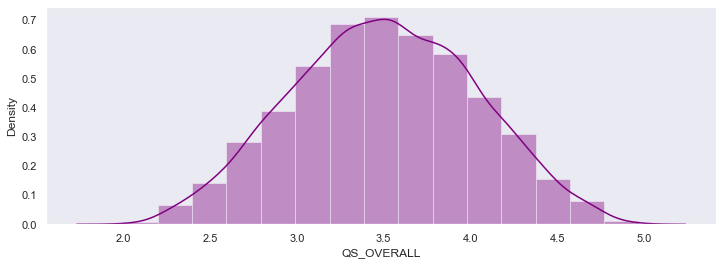

In [419]:
# Distribution of values in QS_OVERALL

plt.figure(figsize=(12, 4))
sns.distplot(num_cols.QS_OVERALL, bins=15, color='purple')


Above graph illustrates that QS_OVERALL is normaly distribute with a mean ≈ 3.5

In [420]:
# Let's calculate the mean, mode and median for QS_OVERALL

print("QS_OVERALL Mean: {:.2f}".format(num_cols.QS_OVERALL.mean()))
print("QS_OVERALL Median: ", num_cols.QS_OVERALL.median())
print("QS_OVERALL Mode: ", num_cols.QS_OVERALL.mode())


QS_OVERALL Mean: 3.50
QS_OVERALL Median:  3.5
QS_OVERALL Mode:  0   3.54
dtype: float64


We can see that the mean, mode and the meadian are ≈ 3.5

So replacing missing values in QS_OVERALL column with any of the above would work.

In [421]:
data['QS_OVERALL'] = data['QS_OVERALL'].replace(
    np.nan, data.QS_OVERALL.mean().round(3))

# Check  and confrim all missing values in this column have been taken care of
data.QS_OVERALL.isna().sum()


0

 Missing values in N_BATHROOM column

In [422]:
num_cols.N_BATHROOM.value_counts()


1.00    5589
2.00    1515
Name: N_BATHROOM, dtype: int64

From above, it kind of looks like this column numerical but in fact it is categorical.

In [423]:
# Let's calculate the mean, mode and median for N_BATHROOM


print("N_BATHROOM Mean: {:.2f}".format(num_cols.N_BATHROOM.mean()))
print("N_BATHROOM Median: ", num_cols.N_BATHROOM.median())
print("N_BATHROOM Mode: ", num_cols.N_BATHROOM.mode())


N_BATHROOM Mean: 1.21
N_BATHROOM Median:  1.0
N_BATHROOM Mode:  0   1.00
dtype: float64


Since N_BATHROOM is a categorical column, we can replace missing values with mode value.

In [424]:
data['N_BATHROOM'] = data['N_BATHROOM'].replace(
    np.nan, data.N_BATHROOM.mean().round(3))

# Check  and confrim all missing values in this column have been taken care of
data.N_BATHROOM.isna().sum()


0

 Missing values in N_BEDROOM column

In [425]:
num_cols.N_BEDROOM.value_counts()


1.00    3795
2.00    2352
3.00     707
4.00     254
Name: N_BEDROOM, dtype: int64

 Since there is only one missing value in this column, replacing it with mode will not affect the data very much.

In [426]:
data['N_BEDROOM'] = data['N_BEDROOM'].replace(
    np.nan, data.N_BEDROOM.mean().round(3))

# Check  and confrim all missing values in this column have been taken care of
data.N_BEDROOM.isna().sum()


0

##### 2. Spelling corrections

In [427]:
# Let's check misspelled names in the AREA column

cat_cols.AREA.value_counts()


Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

The above output clearly shows that we have misspelled names in the AREA column

In [428]:
misspelled_dict = {
    'Chrompt': 'Chrompet',
    'Chrmpet': 'Chrompet',
    'Chormpet': 'Chrompet',
    'Karapakam': 'Karapakkam',
    'KKNagar': 'KK Nagar',
    'Velchery': 'Velachery',
    'Ana Nagar': 'Anna Nagar',
    'Ann Nagar': 'Anna Nagar',
    'Adyr': 'Adyar',
    'TNagar': 'T Nagar'
}

data['AREA'] = data.AREA.replace(misspelled_dict)


In [429]:
data.AREA.value_counts()


Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Other categorical features with misspelled names

In [430]:
# SALE_COND with misspelling

cat_cols.SALE_COND.value_counts()


AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [431]:
data['SALE_COND'] = data.SALE_COND.replace(['Adj Land', 'Partiall', 'PartiaLl', 'Ab Normal'], [
                                           'AdjLand', 'Partial', 'Partial', 'AbNormal'])


In [432]:
data.SALE_COND.value_counts()


AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [433]:
# PARK_FACIL with misspelling

cat_cols.PARK_FACIL.value_counts()


Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [434]:
data['PARK_FACIL'] = data.PARK_FACIL.replace(['Noo'], ['No'])


In [435]:

data.PARK_FACIL.value_counts()


Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [436]:
# BUILDTYPE with misspelling

cat_cols.BUILDTYPE.value_counts()


House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [437]:
data['BUILDTYPE'] = data.BUILDTYPE.replace(
    ['Comercial', 'Other'], ['Commercial', 'Others'])


In [438]:
data.BUILDTYPE.value_counts()


House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [439]:
# UTILITY_AVAIL with misspelling

cat_cols.UTILITY_AVAIL.value_counts()


AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [440]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])


In [441]:
data.UTILITY_AVAIL.value_counts()


No Sewer    3700
AllPub      1887
ELO         1522
Name: UTILITY_AVAIL, dtype: int64

In [442]:
# STREET with misspelling

cat_cols.STREET.value_counts()


Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [443]:
data['STREET'] = data.STREET.replace(
    ['Pavd', 'NoAccess'], ['Paved', 'No Access'])


In [444]:
data.STREET.value_counts()


Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [445]:
cat_cols.MZZONE.value_counts()


RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

No misspelled names in the MZZONE column so no updation needed.

##### 3. Duplicates?

Always check for redundant features/variables for better turn-around time.

In [446]:
data.duplicated().any()


False

No duplicate data found in the dataset.

##### 4. Converting colums to correct type/format

DATE_BUILD & DATE_SALE columns in our data are currently in object type, we need to map/convert them to date-time type.

In [447]:
# Correcting feature type

data['DATE_BUILD'] = pd.to_datetime(data.DATE_BUILD)

data['DATE_SALE'] = pd.to_datetime(data.DATE_SALE)


From the above 2 features, we can calculate the age of the house.

In [448]:
data['HOUSE_AGE_DAYS'] = data.DATE_SALE - data.DATE_BUILD


Converting HOUSE_AGE to years from days.

In [449]:
d_to_y = [(data.HOUSE_AGE_DAYS[x].days/365) for x in range(data.shape[0])]

d_to_y = [int(x) for x in d_to_y]

data['HOUSE_AGE'] = d_to_y

print(data.head(5))

   PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004 2011-04-05            131       1.00   
1  P09411  Anna Nagar      1986 2006-12-19             26       2.00   
2  P01812       Adyar       909 2012-04-02             70       1.00   
3  P05346   Velachery      1855 2010-03-13             14       3.00   
4  P06210  Karapakkam      1226 2009-05-10             84       1.00   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... MZZONE QS_ROOMS QS_BATHROOM  \
0        1.00       3  AbNormal        Yes  ...      A     4.00        3.90   
1        1.00       5  AbNormal         No  ...     RH     4.90        4.20   
2        1.00       3  AbNormal        Yes  ...     RL     4.10        3.80   
3        2.00       5    Family         No  ...      I     4.70        3.90   
4        1.00       3  AbNormal        Yes  ...      C     3.00        2.50   

  QS_BEDROOM QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  HOUSE_AGE_DAYS  \
0       4.90       

In [450]:
data.shape

(7109, 24)

Before we move forward with dropping unnecessary columns, let us first convert some necessary numeric columns to categorical columns, or rather converting datatype of some colums to their respective format 

In [451]:
num_cols.columns


Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [452]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   PRT_ID          7109 non-null   object         
 1   AREA            7109 non-null   object         
 2   INT_SQFT        7109 non-null   int64          
 3   DATE_SALE       7109 non-null   datetime64[ns] 
 4   DIST_MAINROAD   7109 non-null   int64          
 5   N_BEDROOM       7109 non-null   float64        
 6   N_BATHROOM      7109 non-null   float64        
 7   N_ROOM          7109 non-null   int64          
 8   SALE_COND       7109 non-null   object         
 9   PARK_FACIL      7109 non-null   object         
 10  DATE_BUILD      7109 non-null   datetime64[ns] 
 11  BUILDTYPE       7109 non-null   object         
 12  UTILITY_AVAIL   7109 non-null   object         
 13  STREET          7109 non-null   object         
 14  MZZONE          7109 non-null   object  

In [453]:
data.head(10)


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE_DAYS,HOUSE_AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1.00,1.00,3,AbNormal,Yes,...,A,4.00,3.90,4.90,4.33,380000,144400,7600000,16031 days,43
1,P09411,Anna Nagar,1986,2006-12-19,26,2.00,1.00,5,AbNormal,No,...,RH,4.90,4.20,2.50,3.77,760122,304049,21717770,4015 days,11
2,P01812,Adyar,909,2012-04-02,70,1.00,1.00,3,AbNormal,Yes,...,RL,4.10,3.80,2.20,3.09,421094,92114,13159200,7152 days,19
3,P05346,Velachery,1855,2010-03-13,14,3.00,2.00,5,Family,No,...,I,4.70,3.90,3.60,4.01,356321,77042,9630290,8030 days,22
4,P06210,Karapakkam,1226,2009-05-10,84,1.00,1.00,3,AbNormal,Yes,...,C,3.00,2.50,4.10,3.29,237000,74063,7406250,10802 days,29
5,P00219,Chrompet,1220,2014-11-09,36,2.00,1.00,4,Partial,No,...,RH,4.50,2.60,3.10,3.32,409027,198316,12394750,1796 days,4
6,P09105,Chrompet,1167,2007-05-04,137,1.00,1.00,3,Partial,No,...,RL,3.60,2.10,2.50,2.67,263152,33955,8488790,10013 days,27
7,P09679,Velachery,1847,2006-03-13,176,3.00,2.00,5,Family,No,...,RM,2.40,4.50,2.10,3.26,604809,235204,16800250,3650 days,10
8,P03377,Chrompet,771,2011-06-04,175,1.00,1.00,2,AdjLand,No,...,RM,2.90,3.70,4.00,3.55,257578,33236,8308970,12469 days,34
9,P09623,Velachery,1635,2006-06-22,74,2.00,1.00,4,AbNormal,No,...,I,3.10,3.10,3.30,3.16,323346,121255,8083650,5475 days,15


In [454]:
data['N_BATHROOM'] = data.N_BATHROOM.apply(int)

data['N_BEDROOM'] = data.N_BEDROOM.apply(int)

# data['N_BATHROOM'] = data.N_BATHROOM.apply(str)


In [455]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   PRT_ID          7109 non-null   object         
 1   AREA            7109 non-null   object         
 2   INT_SQFT        7109 non-null   int64          
 3   DATE_SALE       7109 non-null   datetime64[ns] 
 4   DIST_MAINROAD   7109 non-null   int64          
 5   N_BEDROOM       7109 non-null   int64          
 6   N_BATHROOM      7109 non-null   int64          
 7   N_ROOM          7109 non-null   int64          
 8   SALE_COND       7109 non-null   object         
 9   PARK_FACIL      7109 non-null   object         
 10  DATE_BUILD      7109 non-null   datetime64[ns] 
 11  BUILDTYPE       7109 non-null   object         
 12  UTILITY_AVAIL   7109 non-null   object         
 13  STREET          7109 non-null   object         
 14  MZZONE          7109 non-null   object  

Here, instead of .astype(int32 converstion for int) I used .apply(int64 conversion for int) to get the same datatype as the rest of the respective features.

##### 5. Dropping unwanted columns

In [456]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'HOUSE_AGE_DAYS', 'HOUSE_AGE'],
      dtype='object')

In [457]:
data.drop(['DATE_BUILD', 'DATE_SALE', 'PRT_ID', 'HOUSE_AGE_DAYS'], axis=1, inplace=True)


In [458]:
data.columns


Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

In [459]:
data.shape

(7109, 20)

## Visializing the data

array([[<AxesSubplot:title={'center':'INT_SQFT'}>,
        <AxesSubplot:title={'center':'DIST_MAINROAD'}>,
        <AxesSubplot:title={'center':'N_BEDROOM'}>,
        <AxesSubplot:title={'center':'N_BATHROOM'}>],
       [<AxesSubplot:title={'center':'N_ROOM'}>,
        <AxesSubplot:title={'center':'QS_ROOMS'}>,
        <AxesSubplot:title={'center':'QS_BATHROOM'}>,
        <AxesSubplot:title={'center':'QS_BEDROOM'}>],
       [<AxesSubplot:title={'center':'QS_OVERALL'}>,
        <AxesSubplot:title={'center':'REG_FEE'}>,
        <AxesSubplot:title={'center':'COMMIS'}>,
        <AxesSubplot:title={'center':'SALES_PRICE'}>],
       [<AxesSubplot:title={'center':'HOUSE_AGE'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

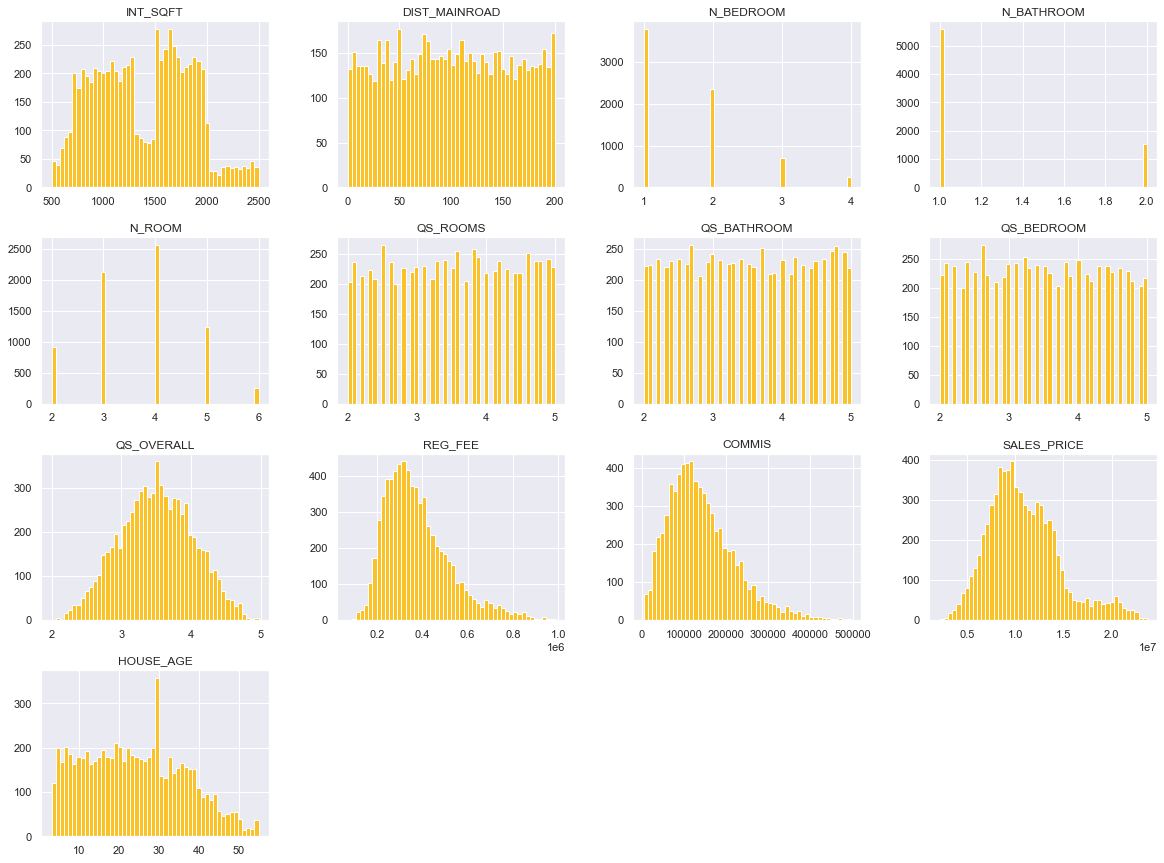

In [460]:
sns.set_palette('inferno_r')
data.hist(bins=50, figsize=(20, 15))

### Checking colinearity and relationship of each fetaure with our target variable

We'll take each column at a time and work on it

In [461]:
data.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
INT_SQFT,1.00,0.00,0.79,0.52,0.95,0.02,-0.01,0.01,0.01,0.66,0.57,0.61,-0.01
DIST_MAINROAD,0.00,1.00,-0.00,0.00,0.00,0.00,-0.03,0.00,-0.02,0.01,0.01,0.02,-0.00
N_BEDROOM,0.79,-0.00,1.00,0.76,0.84,0.01,-0.01,0.02,0.01,0.46,0.43,0.33,-0.05
N_BATHROOM,0.52,0.00,0.76,1.00,0.57,0.01,-0.01,0.01,0.01,0.26,0.26,0.11,-0.02
N_ROOM,0.95,0.00,0.84,0.57,1.00,0.02,-0.01,0.02,0.02,0.63,0.53,0.60,-0.03
QS_ROOMS,0.02,0.00,0.01,0.01,0.02,1.00,0.01,0.01,0.52,0.02,0.01,0.02,0.02
QS_BATHROOM,-0.01,-0.03,-0.01,-0.01,-0.01,0.01,1.00,-0.01,0.55,-0.01,-0.00,-0.01,0.02
QS_BEDROOM,0.01,0.00,0.02,0.01,0.02,0.01,-0.01,1.00,0.63,0.02,0.02,0.02,-0.02
QS_OVERALL,0.01,-0.02,0.01,0.01,0.02,0.52,0.55,0.63,1.00,0.02,0.02,0.02,0.01
REG_FEE,0.66,0.01,0.46,0.26,0.63,0.02,-0.01,0.02,0.02,1.00,0.66,0.88,-0.12


##### ****AREA****

In [462]:
data.AREA.value_counts()


Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Text(0.5, 1.0, 'AREA wise House count')

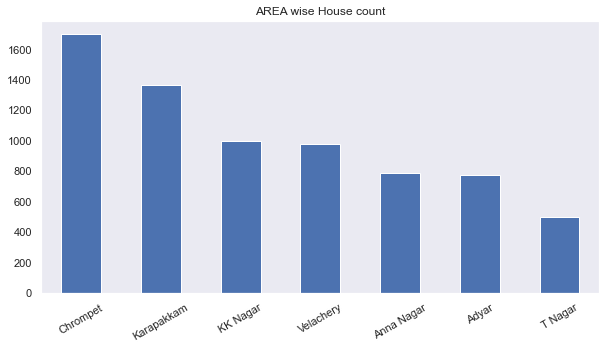

In [463]:
plt.figure(figsize=(10, 5))
sns.set_theme(style='dark')
data['AREA'].value_counts().plot(kind='bar')
plt.xticks(rotation=30)
plt.title("AREA wise House count")


- From above, we can see that most houses are in Chrompet followed by Karapakkam.
- T Nagar has the lowest number of houses compared to other areas.


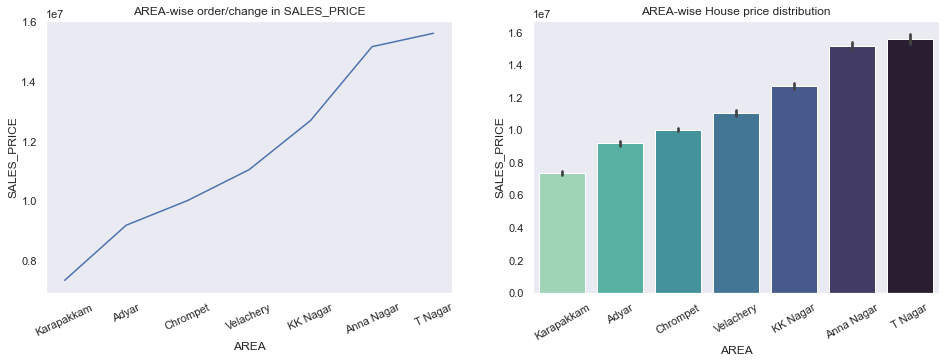

In [464]:
# Checking colinearity and relation between AREA and SALES_PRICE

plt.figure(figsize=(16, 5))

plt.subplot(121)
# sns.lineplot(x=data.AREA, y=data.SALES_PRICE)
sns.lineplot(x='AREA', y='SALES_PRICE', data=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index())
plt.xticks(rotation=25)
plt.title('AREA-wise order/change in SALES_PRICE')

plt.subplot(122)
sns.barplot(x='AREA', y='SALES_PRICE', data=data, palette='mako_r', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('AREA-wise House price distribution')

plt.show()


- We can see that there is a strong linear relatinoship between AREA and SALES_PRICE
- From graph 1 & 2, we can see that the SALES_PRICE is highest in T Nagar followed by Anna Nagar and the lowest in Karapakkam

##### ****INT_SQFT****

<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

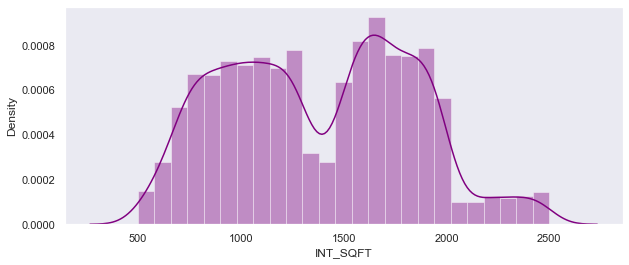

In [465]:
# Distribution

plt.figure(figsize=(10,4))
sns.set_style('dark')
sns.distplot(data.INT_SQFT, kde=True, color='Purple', bins=25)

We can see that INT_SQFT is normally distributed

<AxesSubplot:xlabel='INT_SQFT'>

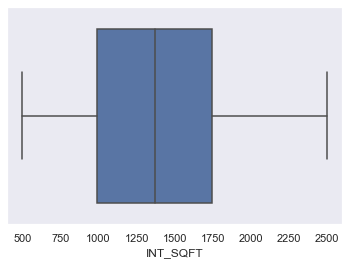

In [466]:
# Checking for outliers as we are looking into a continuous feature

sns.set_style('dark')
sns.boxplot(x='INT_SQFT', data=data)

No outlier found in continuous INT_SQFT feature

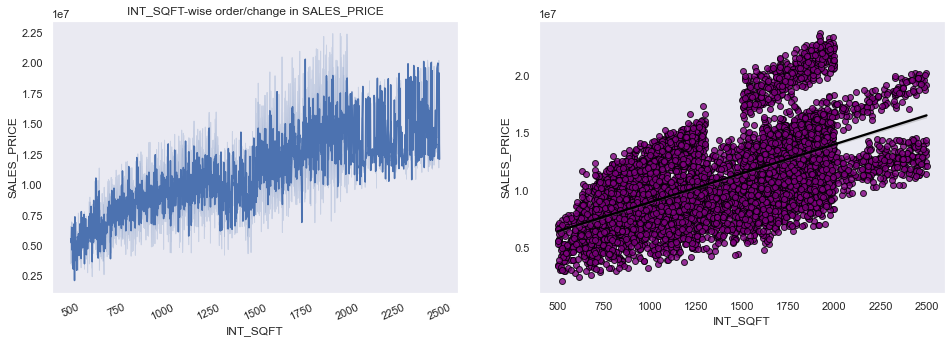

In [467]:
# Linearity between INT_SQFT and SALES_PRICE

plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.lineplot(x=data.INT_SQFT, y=data.SALES_PRICE)
plt.xticks(rotation=25)
plt.title('INT_SQFT-wise order/change in SALES_PRICE')

# Plotting relation between INT_SQFT and SALES_PRICE

plt.subplot(122)
sns.regplot(x='INT_SQFT', y='SALES_PRICE', data=data, scatter_kws={"color": "Purple", "edgecolor": "Black"}, line_kws={"color": "Black"})

plt.show()

In [468]:
# Plotting relation between INT_SQFT and SALES_PRICE

# plt.figure(figsize=(10,5))
# sns.regplot(x='INT_SQFT', y='SALES_PRICE', data=data, scatter_kws={"color": "Purple", "edgecolor": "Black"}, line_kws={"color": "Black"})

- We can see that there is a linear relationship between INT_SQFT and SALES_PRICE
- Hence, we can conclude that as the INT_SQFT increases, SALES_PRICE also increases


In [469]:
# Correlation between INT_SQFT and SALES_PRICE

data[['INT_SQFT', 'SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.00,0.61
SALES_PRICE,0.61,1.00


There is a positive correlation between INT_SQFT and SALES_PRICE which confirms the observation we see in the above plot.

Checking AREA vs INT_SQFT relationship as we know each area can have houses with varying SQFT. Let's see how it turns out.

Text(0.5, 1.0, 'Area-wise House SQFT')

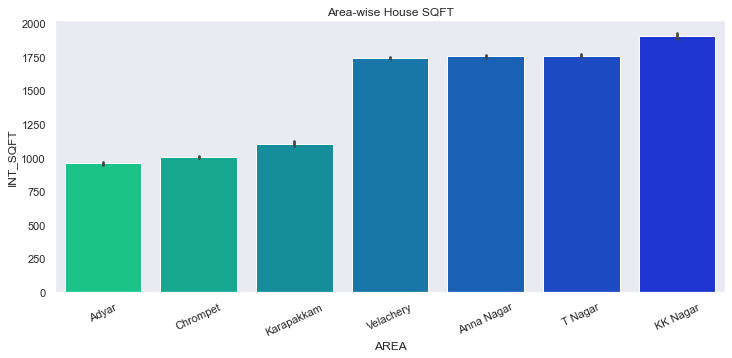

In [470]:
plt.figure(figsize=(12, 5))

sns.barplot(x='AREA', y='INT_SQFT', data=data, palette='winter_r', order=data[['AREA', 'INT_SQFT']].groupby('AREA').mean().sort_values('INT_SQFT').reset_index().AREA)
plt.xticks(rotation = 25)
plt.title('Area-wise House SQFT')

- We can see that the lowest SQFT houses are in Adyar as opposed to KK Nagar which has the highest SQFT houses.
- We can also see that there is a decent linear relationship between AREA and INT_SQFT


Let's now check and see SALES_PRICE vs INT_SQFT relationship for each AREA

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

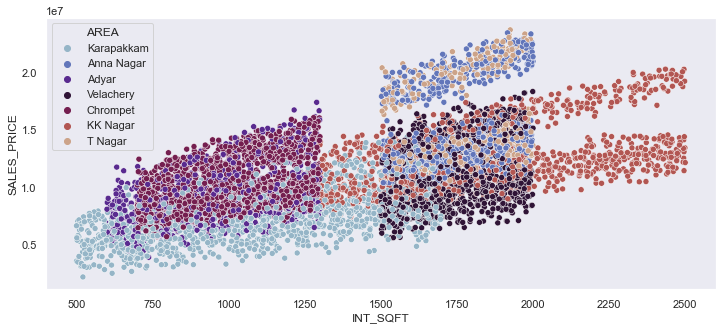

In [471]:
# SALES_PRICE vs INT_SQFT for each AREA

plt.figure(figsize=(12,5))
sns.scatterplot(x=data.INT_SQFT, y=data.SALES_PRICE, hue=data.AREA, palette='twilight')

- SALES_PRICE increases with increase in INT_SQFT irrespective of the AREA
- Anna Nagar and T Nagar has the highest SALES_PRICES for average INT_SQFT ranging from 1500 to 2000 SQFT whereas KK Nagar has the highest number of houses ranging from 1300 to 2500 SQFT even though the SALES_PRICE there is on the lower side.
- Hence, we can conclude that the SALES_PRICES depend more on the AREA rather than INT_SQFT
- Chrompet and Adyar has SALES_PRICE on a higher side even when the INT_SQFT is lower compared to other AREA


#### ****DIST_MAINROAD****

<AxesSubplot:xlabel='DIST_MAINROAD'>

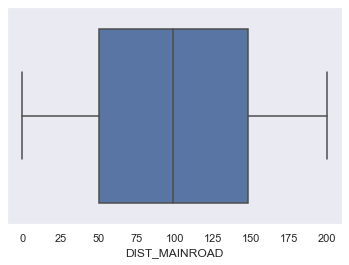

In [472]:
# Checking for outliers as we are looking into a continuous feature

sns.set_style('dark')
sns.boxplot(x='DIST_MAINROAD', data=data)

No outliers found in this feature.

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

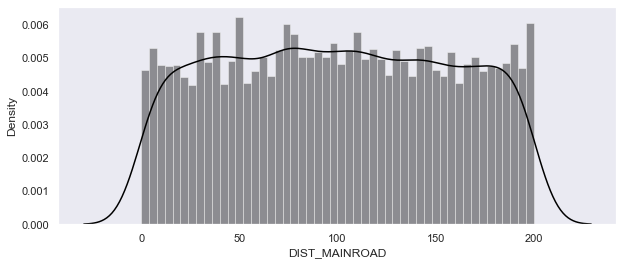

In [473]:
# Distribution

plt.figure(figsize=(10,4))
sns.set_style('dark')
sns.distplot(data.DIST_MAINROAD, kde=True, color='black', bins=50)

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

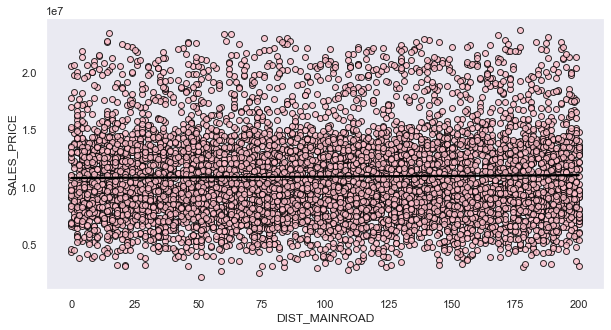

In [474]:
# Plotting relation between INT_SQFT and SALES_PRICE

plt.figure(figsize=(10,5))
sns.regplot(x='DIST_MAINROAD', y='SALES_PRICE', data=data, scatter_kws={"color": "Pink", "edgecolor": "Black"}, line_kws={"color": "Black"})

These graphs show that DIST_MAINROAD has a uniform distribution

In [475]:
# Correlation between DIST_MAINROAD and SALES_PRICE

data[['DIST_MAINROAD', 'SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.00,0.02
SALES_PRICE,0.02,1.00


As we can see, correlation between DIST_MAINROAD and SALES_PRICE is close to 0 meaning there is no linear relation between these two.

Checking DIST_MAINROAD vs AREA as it mildly impacts the house prices in reality.

Text(0.5, 1.0, 'Area-wise distances of houses from the main road')

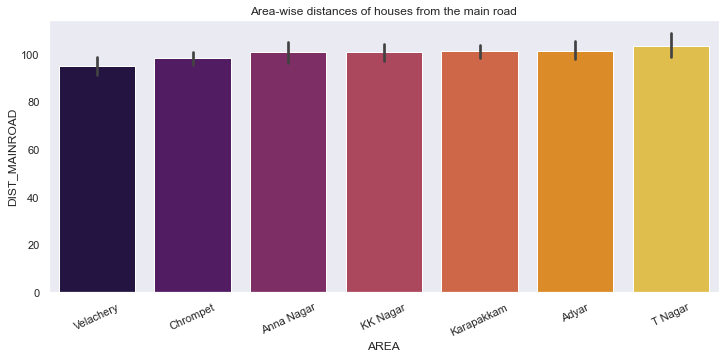

In [476]:
plt.figure(figsize=(12, 5))

sns.barplot(x='AREA', y='DIST_MAINROAD', data=data, palette='inferno', order=data[['AREA', 'DIST_MAINROAD']].groupby('AREA').mean().sort_values('DIST_MAINROAD').reset_index().AREA)
plt.xticks(rotation = 25)
plt.title('Area-wise distances of houses from the main road')

- There is not much of a difference in distnaces of the houses from the main road meaning all areas have almost the same distance from the main road


<Figure size 1440x1080 with 0 Axes>

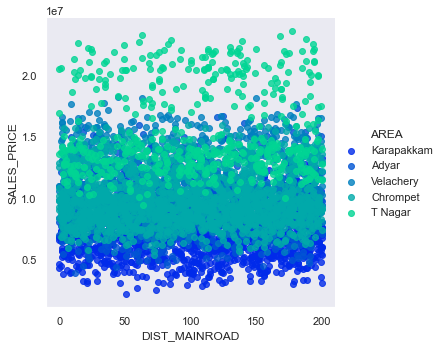

In [477]:
# SALES_PRICE vs DIST_MAINROAD for each AREA just for the sake of it

plt.figure(figsize=(20,15))
sns.lmplot(x='DIST_MAINROAD', y='SALES_PRICE', hue='AREA', palette='winter', data=data.loc[data['AREA'].isin(['Chrompet', 'Karapakkam', 'KK NAGAR', 'T Nagar', 'Adyar', 'Anna NAgar', 'Velachery'])], fit_reg=False)

- So, with the graphs and corr(), we can infer that DIST_MAINROAD will not have much of an impact on the SALES_PRICE


#### ****N_BEDROOM****

Text(0.5, 1.0, 'Number of Bedrooms')

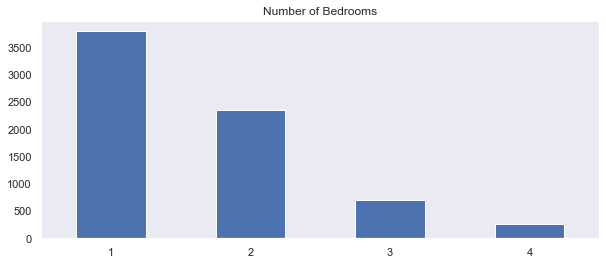

In [478]:
# Distribution 

plt.figure(figsize=(10,4))
data['N_BEDROOM'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of Bedrooms')

From this plot and even generally, we get to see that most of the houses have either 1 bedrooms or 2.

In [479]:
data[['N_BEDROOM', 'SALES_PRICE']].corr()

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.00,0.33
SALES_PRICE,0.33,1.00


There is a decent correlation between N_BEDROOM and SALES_PRICE

Let's check what is the impact of N_BEDROOM on SALES_PRICE

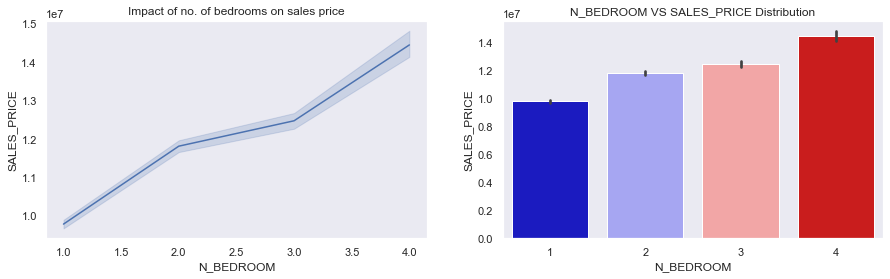

In [480]:
# N_BEDROOM Vs SALES_PRICE

plt.figure(figsize=(15,4))

plt.subplot(121)
sns.lineplot(x=data.N_BEDROOM, y=data.SALES_PRICE)
plt.title('Impact of no. of bedrooms on sales price')

plt.subplot(122)
sns.barplot(x='N_BEDROOM', y='SALES_PRICE', data=data, palette='seismic', order=data[['N_BEDROOM', 'SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE').reset_index().N_BEDROOM)
# plt.xticks(rotation=30)
plt.title('N_BEDROOM VS SALES_PRICE Distribution')

plt.show()

- We can observe that the SALES_PRICE increases as the N_BEDROOM increases hence there is a linear relationship between the two.

Let's first check relationship between N_BEDROOM and AREA

<AxesSubplot:xlabel='AREA', ylabel='count'>

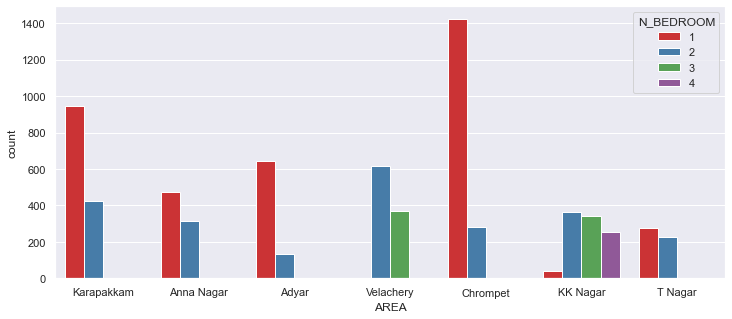

In [481]:
# N_BEDROOM Vs AREA

plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid', palette='Set1')
sns.countplot(x='AREA', hue='N_BEDROOM', data=data)

- We can see that only KK Nagar has 4 Bedroom houses and the rest of them mostly have 1 bedroom houses. 
- Chrompet has the most number of 1 bedroom houses in all of the areas followed by Karapakkam.
- Only KK Nagar has 1, 2, 3 and 4 bedrrom houses and Velachery has 2 and 3 bedroom houses, rest of them only of 1 and 2 bedroom houses.


Generally, as the number of bedrooms increases, SQFT also increases so let's check their relation.

In [482]:
data[['N_BEDROOM', 'INT_SQFT']].corr()

,N_BEDROOM,INT_SQFT
N_BEDROOM,1.00,0.79
INT_SQFT,0.79,1.00


Text(0.5, 1.0, 'Impact of N_BEDROOMS on INT_SQFT')

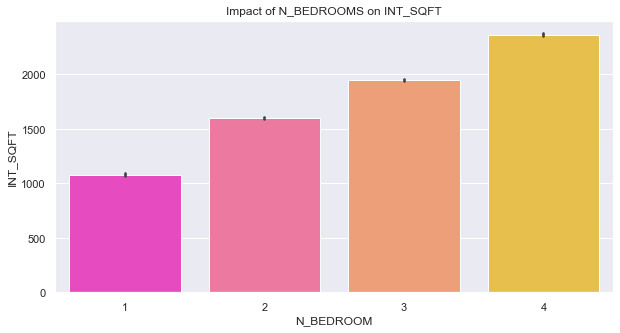

In [483]:
# N_BEDROOM Vs INT_SQFT

plt.figure(figsize=(10,5))

sns.barplot(x='N_BEDROOM', y='INT_SQFT', data=data, palette='spring', order=data[['N_BEDROOM', 'INT_SQFT']].groupby('N_BEDROOM').mean().sort_values('INT_SQFT').reset_index().N_BEDROOM)
plt.title('Impact of N_BEDROOMS on INT_SQFT')

This graph and the correlation of 0.79 proves that there is linear relationship between N_BEDROOM and INT_SQFT meaning as the number of bedrooms increases, the SQFT also increases. 

Let's now see how N_BEDROOM impacts INT_SQFT of houses in AREA

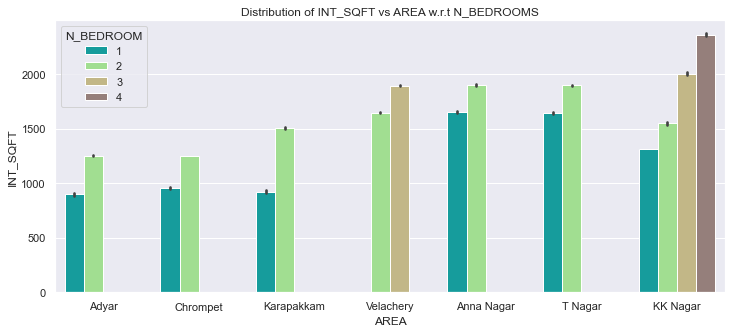

In [484]:
# Area vs INT_SQFT with respect to N_BEDROOM

plt.figure(figsize=(12, 5))

sns.barplot(x='AREA', y='INT_SQFT', hue='N_BEDROOM', data=data, palette='terrain', order=data[['AREA', 'INT_SQFT']].groupby('AREA').mean().sort_values('INT_SQFT').reset_index().AREA)
plt.title('Distribution of INT_SQFT vs AREA w.r.t N_BEDROOMS')
plt.show()

From the above graph, it can be observed that the INT_SQFT is same for Velachery and T Nagar areas however the N_BEDROOM differs, 2 & 3 as opposed to 1 & 2 respectively.

We know that the SALES_PRICE differ with AREA. Let's check how N_BEDROOM affects SALES_PRICE in each AREA.


Text(0.5, 1.0, 'Distribution of SALES_PRICE vs AREA w.r.t N_BEDROOMS')

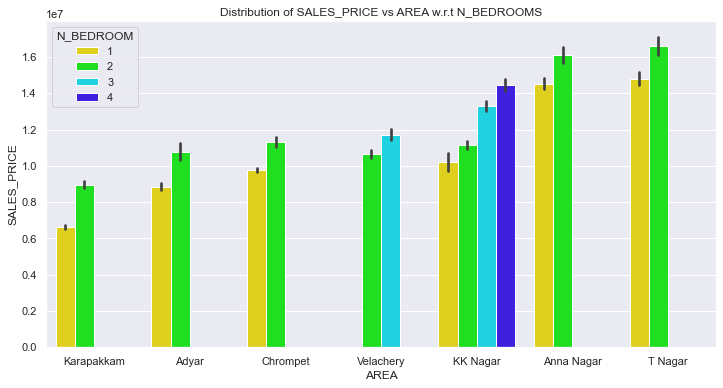

In [485]:
# SALES_PRICE vs N_BEDROOM for each AREA

plt.figure(figsize=(12, 6))

sns.barplot(x='AREA', y='SALES_PRICE', hue='N_BEDROOM', data=data, palette='gist_rainbow', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title('Distribution of SALES_PRICE vs AREA w.r.t N_BEDROOMS')

- In coclusion, we can see Anna Nagar and T Nagar have the highest SALES_PRICE irrecpective of having on 1 & 2 N_BEDROOM.
- Even though the SALES_PRICE increases with the increase in N_BEDROOM, still AREA has a larger impact on the SALES_PRICE.


#### ****N_BATHROOM****

In [486]:
data.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

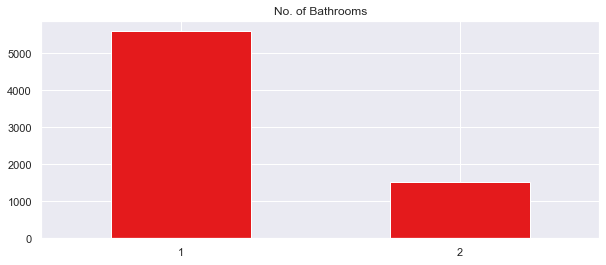

In [487]:
plt.figure(figsize=(10,4))
data['N_BATHROOM'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('No. of Bathrooms')
plt.show()

From the above data and graph, we can see that most houses have 1 bathroom.

Let's see how N_BATHROOM affects the SALES_PRICE.

In [488]:
data[['N_BATHROOM', 'SALES_PRICE']].corr()

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.00,0.11
SALES_PRICE,0.11,1.00


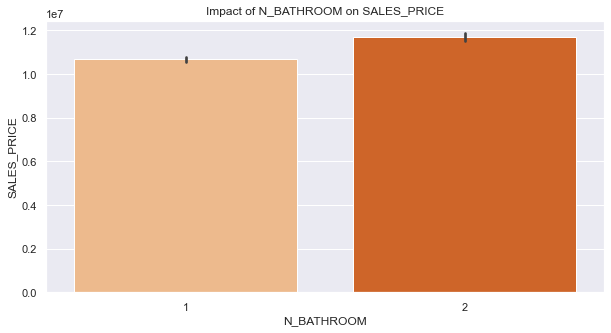

In [489]:
# N_BATHROOM Vs SALES_PRICE
plt.figure(figsize=(10,5))

sns.barplot(x='N_BATHROOM', y='SALES_PRICE', data=data, palette='Oranges', order=data[['N_BATHROOM', 'SALES_PRICE']].groupby('N_BATHROOM').mean().sort_values('SALES_PRICE').reset_index().N_BATHROOM)
plt.title('Impact of N_BATHROOM on SALES_PRICE')
plt.show()

Here, we can see that N_BATHROOM and SALES_PRICE are loosely correlated meaning number of bathrooms does not impact sales price very much.

Let's check relationship between N_BEDROOM and N_BATHROOM because in real life they inter-related and impact the SALES_PRICE overall.

In [490]:
data[['N_BATHROOM', 'N_BEDROOM']].corr()

,N_BATHROOM,N_BEDROOM
N_BATHROOM,1.00,0.76
N_BEDROOM,0.76,1.00


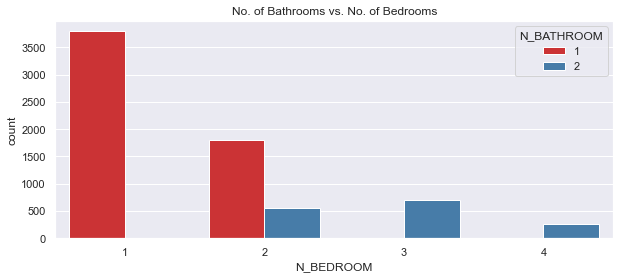

In [491]:
plt.figure(figsize=(10,4))

sns.countplot(x='N_BEDROOM', hue='N_BATHROOM', data=data)
plt.title('No. of Bathrooms vs. No. of Bedrooms')
plt.show()


- We can observe a strong correlation between N_BATHROOM and N_BEDROOM.
- Graph shows that houses having 1 bedroom only has 1 bathroom as opposed to 3/4 bedroom houses which have only 2 bathrooms.
- HOuses having 2 bedrooms has either 1 bathroom or 2 bathroom.


Now let's check how bathroom affects the area as it should.

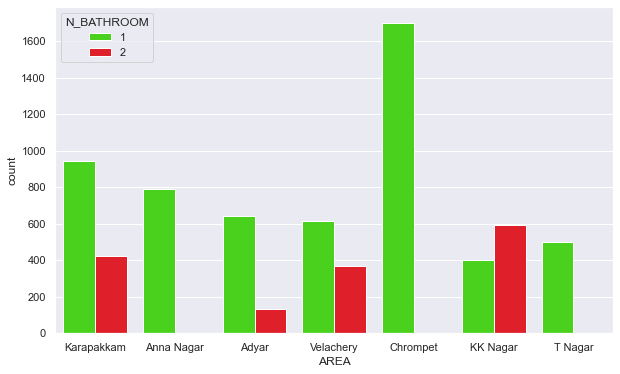

In [492]:
# N_BATHROOM vs. AREA

sns.set_palette('prism')
plt.figure(figsize=(10,6))
sns.countplot(x='AREA', hue='N_BATHROOM', data=data)
plt.show()

We can see that there are areas like Anna Nagar, T Nagar, and Chrompet which do not have any house with 2 bathrooms.

Now, let's check how the SALES_PRICE is affected with respect to N_BATHROOM in each AREA

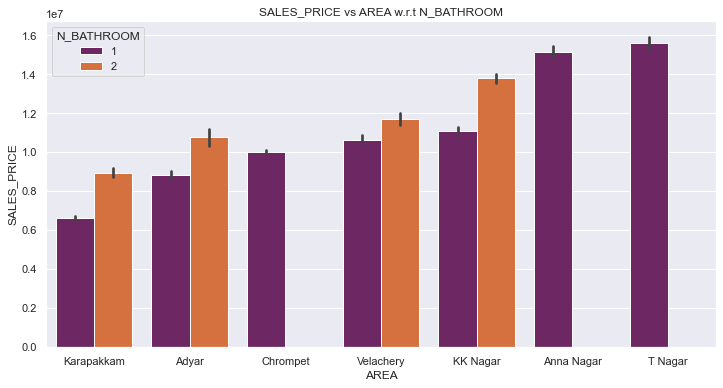

In [493]:
# SALES_PRICE vs. N_BATHROOM for each AREA

plt.figure(figsize=(12, 6))

sns.barplot(x='AREA', y='SALES_PRICE', hue='N_BATHROOM', data=data, palette='inferno', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title('SALES_PRICE vs AREA w.r.t N_BATHROOM')
plt.show()

- We can observe from the above graph that Anna Nagar and T Nagar do not have houses with 2 bathrooms but still the house prices are high in thsoe areas.
- Prices are high for houses with 2 bathrooms in all the areas.


#### ****N_ROOM****

Text(0.5, 1.0, 'Number of Rooms')

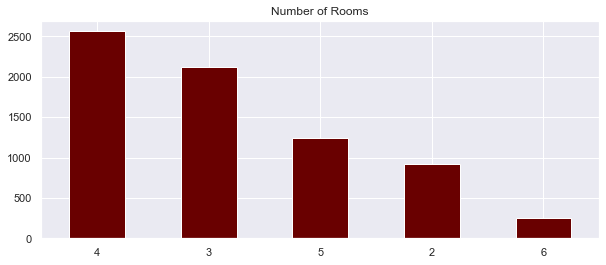

In [494]:
# Distribution 

sns.set_palette('hot')
plt.figure(figsize=(10,4))
data['N_ROOM'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of Rooms')

- Most houses have 4 rooms followed by 3 and 5 rooms.
- Very few houses have 6 rooms.


In [495]:
data[['N_ROOM', 'SALES_PRICE']].corr()

,N_ROOM,SALES_PRICE
N_ROOM,1.00,0.60
SALES_PRICE,0.60,1.00


There is a decent correlation between N_ROOM and SALES_PRICE

Now, let's see how N_ROOM affects the SALES_PRICE

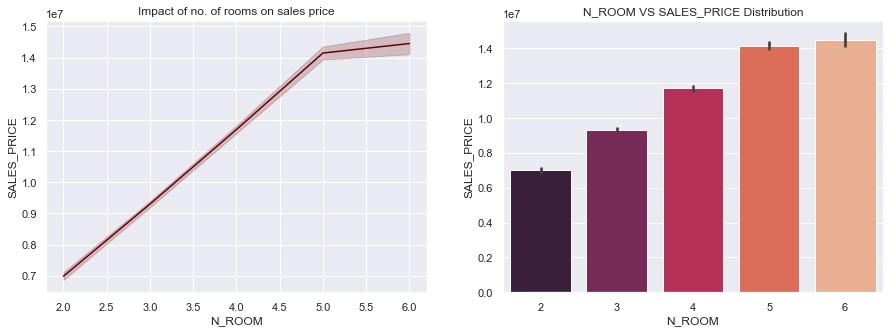

In [496]:
# N_ROOM Vs SALES_PRICE

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(x=data.N_ROOM, y=data.SALES_PRICE)
plt.title('Impact of no. of rooms on sales price')

plt.subplot(122)
sns.barplot(x='N_ROOM', y='SALES_PRICE', data=data, palette='rocket', order=data[['N_ROOM', 'SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE').reset_index().N_ROOM)
# plt.xticks(rotation=30)
plt.title('N_ROOM VS SALES_PRICE Distribution')

plt.show()

- We can clearly see that as N_ROOM increases, so does SALES_PRICE
- N_ROOM has a positive strong coorelation on SALES_PRICE


We know, as the number of rooms increases, the SQFT also increases. Let's check it!

In [497]:
data[['N_ROOM', 'INT_SQFT']].corr()

,N_ROOM,INT_SQFT
N_ROOM,1.00,0.95
INT_SQFT,0.95,1.00


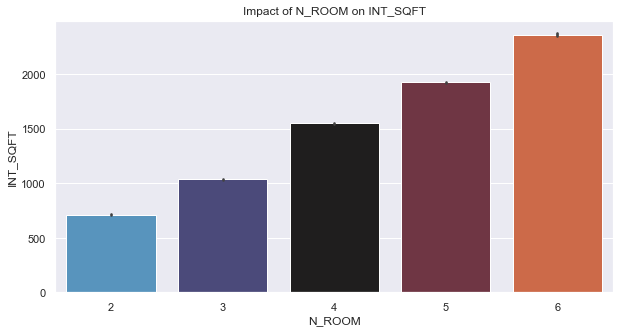

In [498]:
# N_ROOM VS INT_SQFT

plt.figure(figsize=(10,5))

sns.barplot(x='N_ROOM', y='INT_SQFT', data=data, palette='icefire', order=data[['N_ROOM', 'INT_SQFT']].groupby('N_ROOM').mean().sort_values('INT_SQFT').reset_index().N_ROOM)
plt.title('Impact of N_ROOM on INT_SQFT')
plt.show()

We can observe that there is a postivie correlation between the features N_ROOM and INT_SQFT.

Now, as N_ROOM increases, INT_SQFT increases and we know if INT_SQFT increases, AREA is bound to increase. So N_ROOM is indirectly related to AREA.

Let's put it to test, shall we?

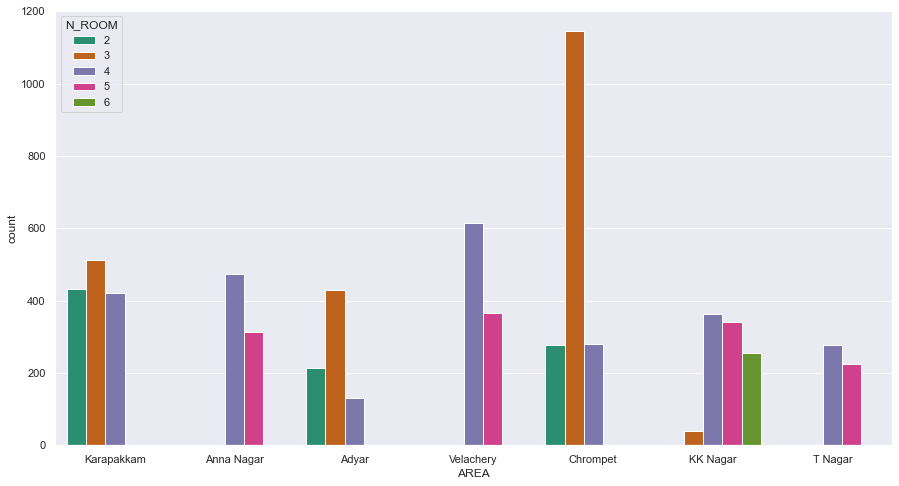

In [499]:
# N_ROOM vs. AREA

plt.figure(figsize=(15,8))
sns.set_palette('Dark2')

sns.countplot(x='AREA', hue='N_ROOM', data=data)
plt.show()

- Only KK Nagar has houses with 6 rooms.
- Chrompet has the highest number of houses with 3 rooms.
- Velachery, Anna Nagar, and T Nagar are the only areas with 4 & 5 rooms.
- Karapakam, Chrmpet and Adyar have houses with 2 rooms.
- Chrompet gives off the data with most suitable houses as far as number of rooms go. 


We know that N_ROOM affects AREA which affects SALES_PRICE. So let's check how these 3 affect each other.

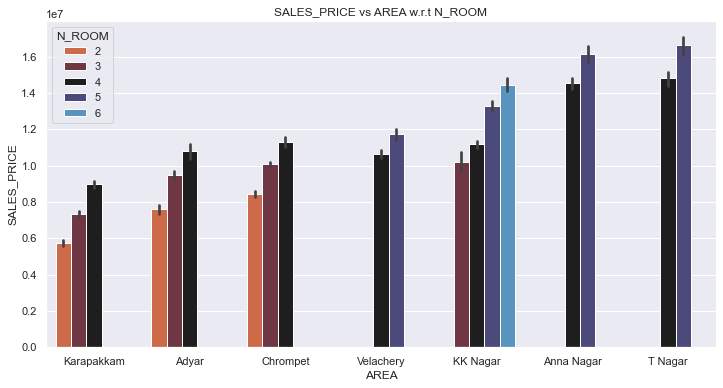

In [500]:
# SALES_PRICE vs. N_ROOM for each AREA

plt.figure(figsize=(12, 6))

sns.barplot(x='AREA', y='SALES_PRICE', hue='N_ROOM', data=data, palette='icefire_r', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title('SALES_PRICE vs AREA w.r.t N_ROOM')
plt.show()

- Here, we can observe that T Nagar and Anna Nagar have the highest prices for 4 and 5 room houses which is even higher that 6 room houses in KK Nagar.
- Velachery has the lowerst SALES_PRICE for 4 room houses of all the areas.


#### ****SALE_COND****

Text(0.5, 1.0, 'Sale condition-wise number of houses')

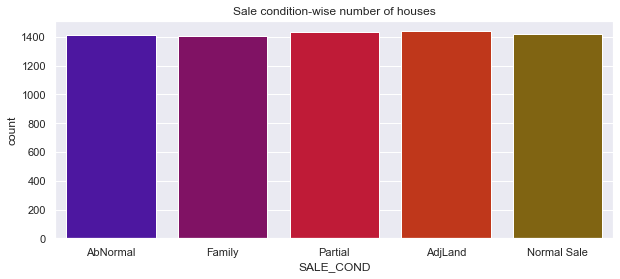

In [501]:
# Distribution 

sns.set_palette('brg')
plt.figure(figsize=(10,4))
# data['SALE_COND'].value_counts().plot(kind='bar')
sns.countplot(x='SALE_COND', data=data)
plt.xticks(rotation=0)
plt.title('Sale condition-wise number of houses')

- We can see that SALE_COND is uniformally distributed

Let's check how SALE_COND impacts SALES_PRICE

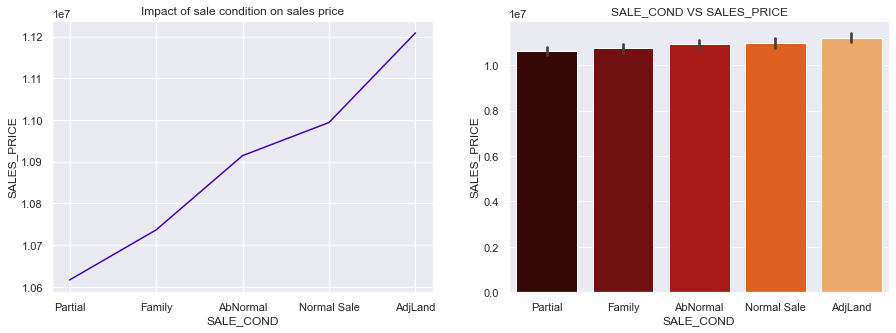

In [502]:
# SALE_COND Vs SALES_PRICE

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(x='SALE_COND', y='SALES_PRICE', data=data[['SALE_COND', 'SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').reset_index())
plt.title('Impact of sale condition on sales price')

plt.subplot(122)
sns.barplot(x='SALE_COND', y='SALES_PRICE', data=data, palette='gist_heat', order=data[['SALE_COND', 'SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').reset_index().SALE_COND)
# plt.xticks(rotation=30)
plt.title('SALE_COND VS SALES_PRICE')

plt.show()

- We can clearly observe a linear relationship between SALE_COND and SALES_PRICE.
- Hence we can label encode SALE_COND

#### ****PARK_FACIL****

Text(0.5, 1.0, 'Parking facility-wise number of houses')

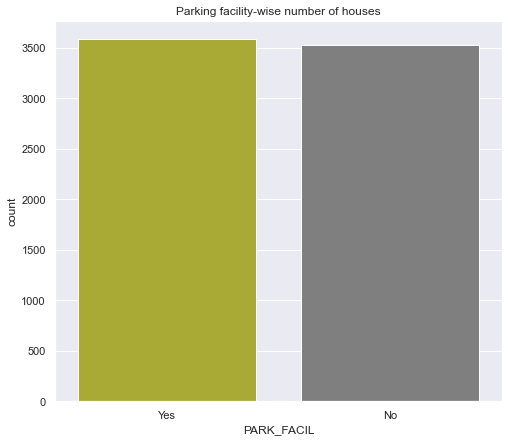

In [503]:
# Distribution 

sns.set_palette('tab10_r')
plt.figure(figsize=(8,7))
sns.countplot(x='PARK_FACIL', data=data)
plt.xticks(rotation=0)
plt.title('Parking facility-wise number of houses')

- We can see there are more number of buildings which have a parking facility

Let's check if PARK_FACIL impacts our SALES_PRICE

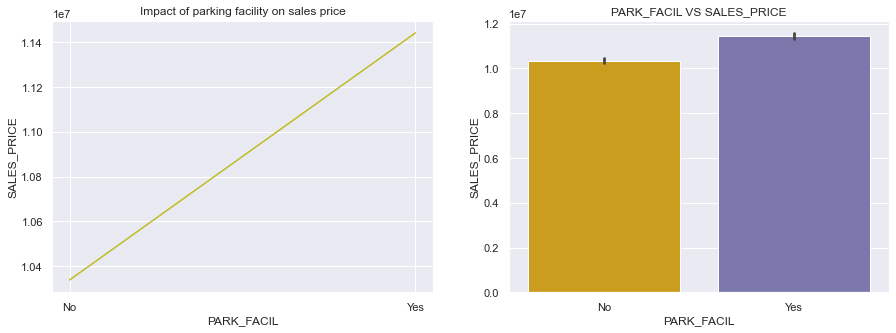

In [504]:
# PARK_FACIL Vs SALES_PRICE

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.set_palette('hot')
sns.lineplot(x='PARK_FACIL', y='SALES_PRICE', data=data[['PARK_FACIL', 'SALES_PRICE']].groupby('PARK_FACIL').mean().sort_values('SALES_PRICE').reset_index())
plt.title('Impact of parking facility on sales price')

plt.subplot(122)
sns.barplot(x='PARK_FACIL', y='SALES_PRICE', data=data, palette='Dark2_r', order=data[['PARK_FACIL', 'SALES_PRICE']].groupby('PARK_FACIL').mean().sort_values('SALES_PRICE').reset_index().PARK_FACIL)
plt.title('PARK_FACIL VS SALES_PRICE')

plt.show()

- There is a relationship between PARK_FACIL and SALES_PRICE as the SALES_PRICE is higher with building which have PARK_FACIL.
- Since this is a binary categorical feature, we can use any encoding method but we'll go with label encoding.


Let's check count of buldings in each area with a parking facility.

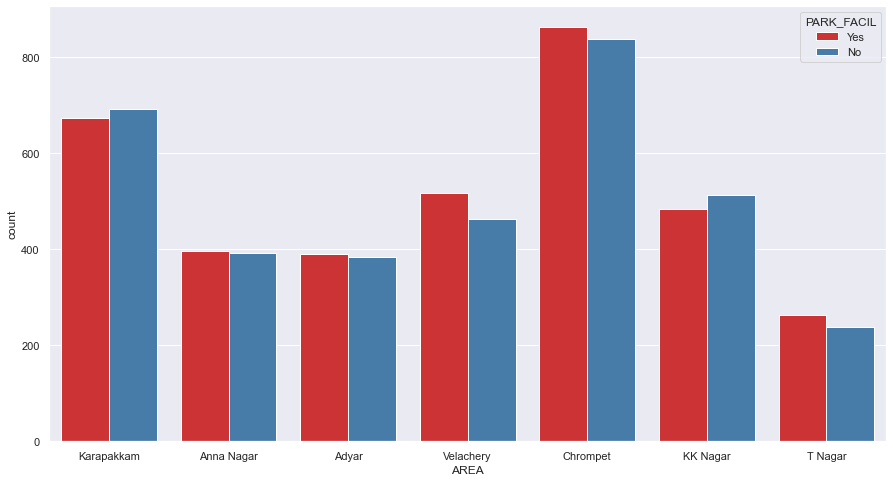

In [505]:
# PARK_FACIL vs AREA

plt.figure(figsize=(15,8))
sns.set_palette('Set1')

sns.countplot(x='AREA', hue='PARK_FACIL', data=data)
plt.show()

- It can be observed that only Karapakkam and KK Nagar have more number of building with no parking facility.


Let's check if there is any relationship between BUILDTYPE and PARK_FACIL

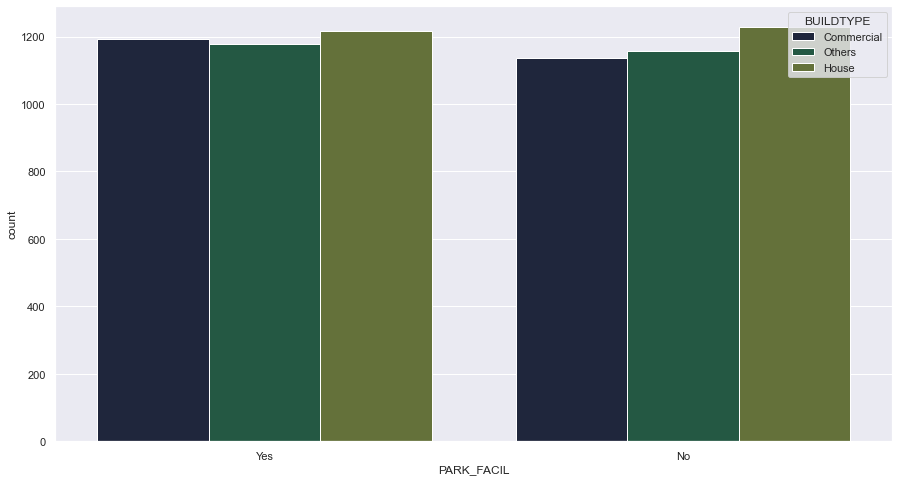

In [506]:
# PARK_FACIL vs BUILDTYPE

plt.figure(figsize=(15,8))
sns.set_palette('cubehelix')

sns.countplot(x='PARK_FACIL', hue='BUILDTYPE', data=data)
plt.show()

- It can be seen that houses are in great numbers with or without a parking facility.
- Commercial building with parking facility are more in mubers than without a parking facility.

Let us now observe how SALES_PRICE are affected with or without the presence of a PARK_FACIL in each AREA

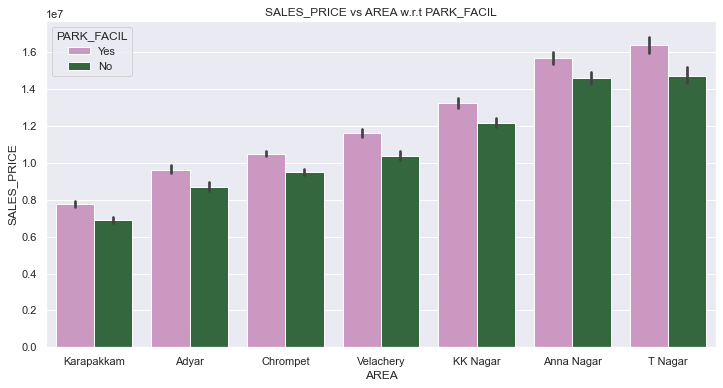

In [507]:
# SALES_PRICE vs. PARK_FACIL for each AREA

plt.figure(figsize=(12, 6))

sns.barplot(x='AREA', y='SALES_PRICE', hue='PARK_FACIL', data=data, palette='cubehelix_r', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title('SALES_PRICE vs AREA w.r.t PARK_FACIL')
plt.show()

- It can be seen that each area has more SALES_PRICE for a building with a parking facility.


Text(0.5, 1.0, 'SALES_PRICE vs BUILDTYPE w.r.t PARK_FACIL')

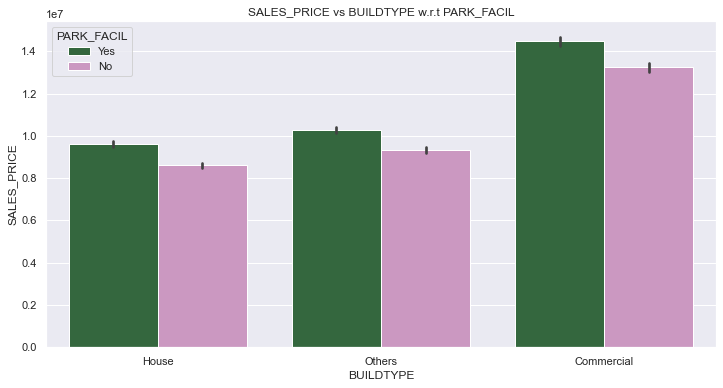

In [508]:
# SALES_PRICE vs. PARK_FACIL for each BUILDTYPE

plt.figure(figsize=(12, 6))

sns.barplot(x='BUILDTYPE', y='SALES_PRICE', hue='PARK_FACIL', data=data, palette='cubehelix', order=data[['BUILDTYPE', 'SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index().BUILDTYPE)
plt.title('SALES_PRICE vs BUILDTYPE w.r.t PARK_FACIL')

- It is now clear that buildings with a parking facility have a highes SALES_PRICE regardles of AREA or BUILDTYPE


#### ****BUILDTYPE****

Text(0.5, 1.0, 'Bulding type-wise number of buldings')

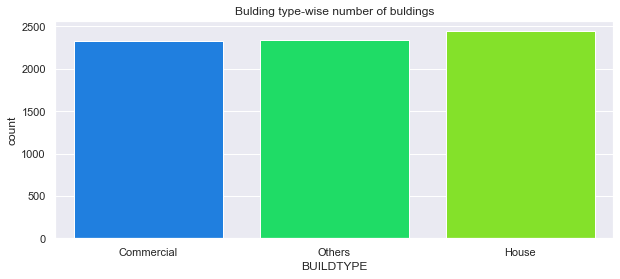

In [509]:
# Distribution 

sns.set_palette('gist_ncar')
plt.figure(figsize=(10,4))
sns.countplot(x='BUILDTYPE', data=data)
plt.xticks(rotation=0)
plt.title('Bulding type-wise number of buldings')

- This shows that most of the buldings are houses

Let's see the BUILDTYPE in each AREA

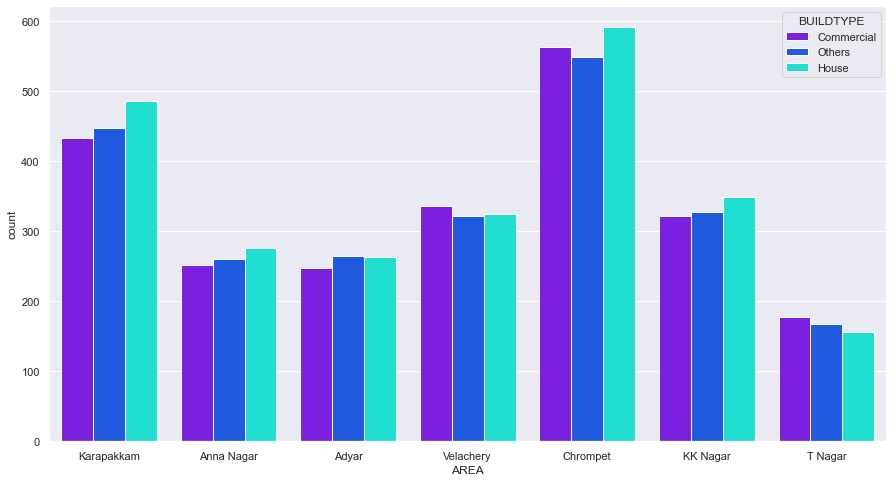

In [510]:
plt.figure(figsize=(15,8))
sns.set_palette('gist_rainbow_r')

sns.countplot(x='AREA', hue='BUILDTYPE', data=data)
plt.show()

- T Nagar is the only areas wherein the houses are in least numbers in respect of building type.
- Velachery also has lower number of houses but commercial buldings are more in numbers.


Let's now check SALE_PRICE with respect to BUILDTYPE

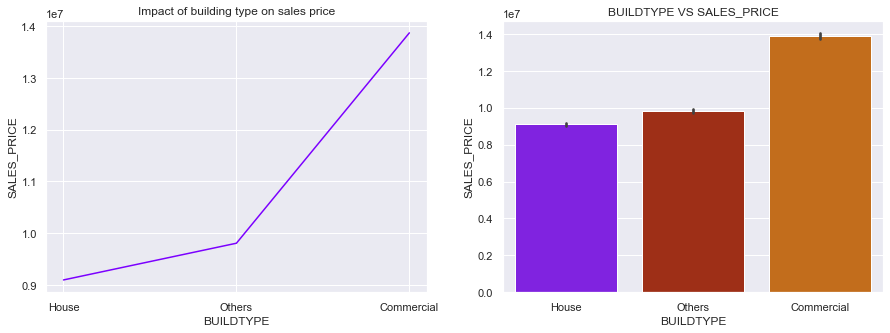

In [511]:
# BUILDTYPE Vs SALES_PRICE

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(x='BUILDTYPE', y='SALES_PRICE', data=data[['BUILDTYPE', 'SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index())
plt.title('Impact of building type on sales price')

plt.subplot(122)
sns.barplot(x='BUILDTYPE', y='SALES_PRICE', data=data, palette='gnuplot', order=data[['BUILDTYPE', 'SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index().BUILDTYPE)
# plt.xticks(rotation=30)
plt.title('BUILDTYPE VS SALES_PRICE')

plt.show()

- It can clearly be observed that commercial building have the highes SALE_PRICE meaning they are expensive even though number of houses are more than commercial building.
- This means that BUILDTYPE also has some impact on SALES_PRICE
- There is no linear relationship(We ignore linearirt when there are very few data points) so we can use any method to encode BUILDTYPE so we'll go with label-encoding.
- We are mailny going to focus on BUILDTYPE -- House.


NOw let's check SALES_PRICE in each AREA with respect to BUILDTYPE

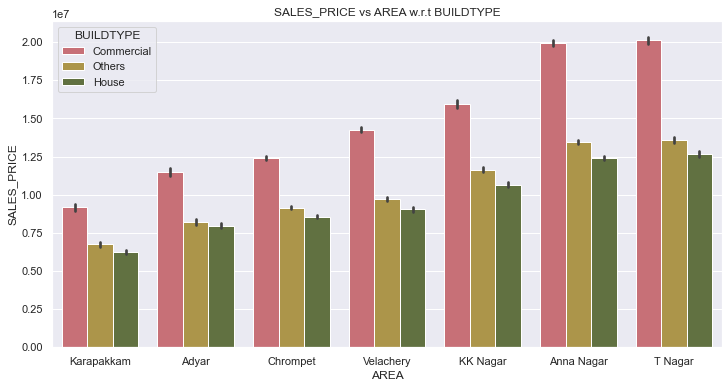

In [512]:
# SALES_PRICE vs. BUILDTYPE for each AREA

plt.figure(figsize=(12, 6))

sns.barplot(x='AREA', y='SALES_PRICE', hue='BUILDTYPE', data=data, palette='tab20b_r', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title('SALES_PRICE vs AREA w.r.t BUILDTYPE')
plt.show()

- It can be observed that commercial buildings have higher SALES_PRICE compared to other BUILDTYPE irrespective of the AREA.

#### ****UTILITY_AVAIL****

Text(0.5, 1.0, 'Number of buldings depending on utilities available')

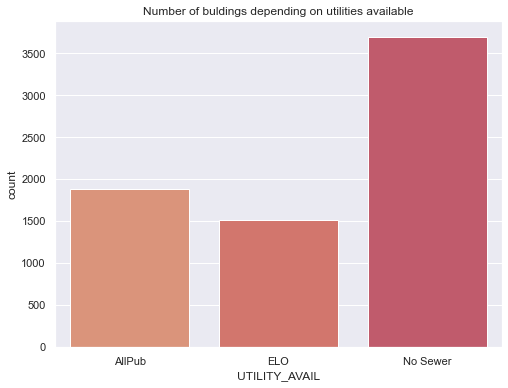

In [513]:
# Distribution 

sns.set_palette('flare')
plt.figure(figsize=(8,6))
sns.countplot(x='UTILITY_AVAIL', data=data)
plt.xticks(rotation=0)
plt.title('Number of buldings depending on utilities available')

- This shows that there are maximum number of buildings with No Sewer. 

Let us now see how UTILITY_AVAIL affects SALES_PRICE

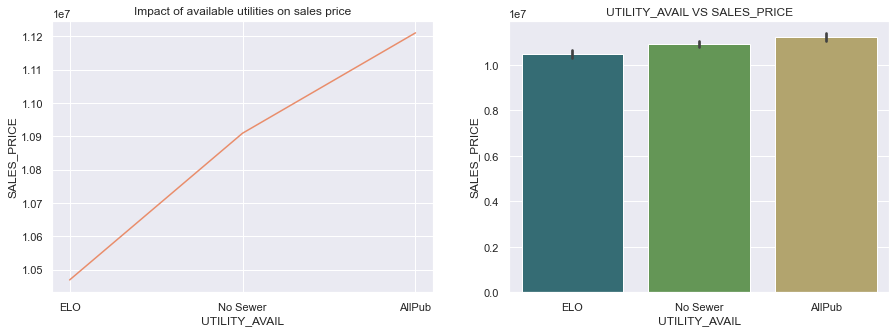

In [514]:
# UTILITY_AVAIL Vs SALES_PRICE

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(x='UTILITY_AVAIL', y='SALES_PRICE', data=data[['UTILITY_AVAIL', 'SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE').reset_index())
plt.title('Impact of available utilities on sales price')

plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL', y='SALES_PRICE', data=data, palette='gist_earth', order=data[['UTILITY_AVAIL', 'SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE').reset_index().UTILITY_AVAIL)
# plt.xticks(rotation=30)
plt.title('UTILITY_AVAIL VS SALES_PRICE')

plt.show()

- Evn though there are more buildings with No Sewer, SALES_PRICE is higher for AllPub utility type.
- We can use any encoding method, we'll go with label encoding.


Let us see if there is any relationship BUILDTYPE and UTILITY_AVAIL

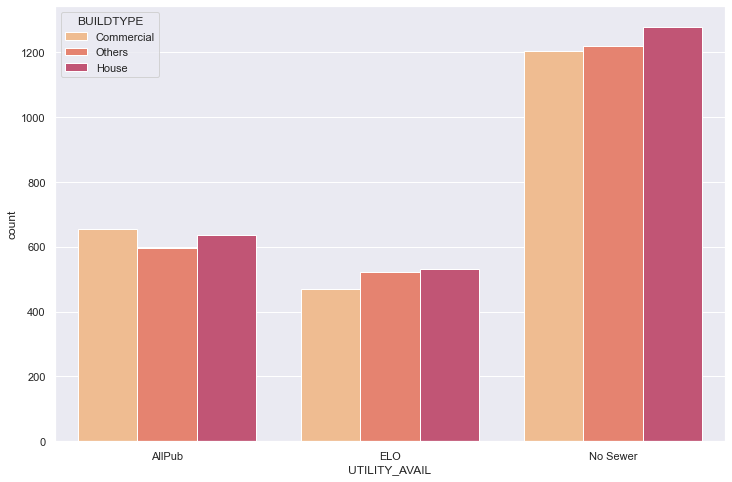

In [515]:
# BUILDTYPE vs. UTILITY_AVAIL

plt.figure(figsize=(12,8))
sns.set_palette('magma_r')

sns.countplot(x='UTILITY_AVAIL', hue='BUILDTYPE', data=data)
plt.show()

- Number of houses are more than any other BUILDTYPE with regards to ELO and No Sewer utilities.
- However, in regards with AllPub utility, number of commercial buildings are more than any other BUILDTYPE.


Let's also check whether UTILITY_AVAIL has any relationship with AREA

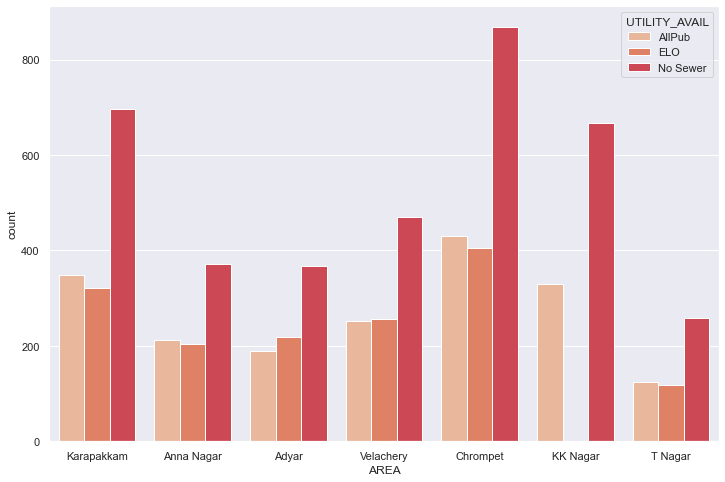

In [516]:
# AREA vs. UTILITY_AVAIL

plt.figure(figsize=(12,8))
sns.set_palette('rocket_r')

sns.countplot(x='AREA', hue='UTILITY_AVAIL', data=data)
plt.show()

- Number of houses with No Sewer utility is the most in every area.

Lastly, let's check if SALES_PRICE is affected by UTILITY_AVAIL in each AREA

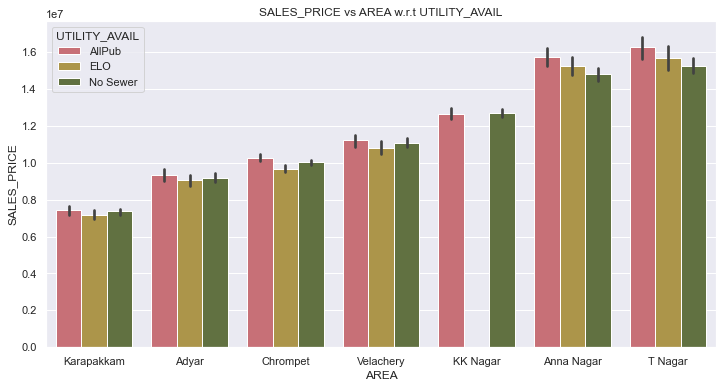

In [517]:
# SALES_PRICE vs. UTILITY_AVAIL for each AREA

plt.figure(figsize=(12, 6))

sns.barplot(x='AREA', y='SALES_PRICE', hue='UTILITY_AVAIL', data=data, palette='tab20b_r', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title('SALES_PRICE vs AREA w.r.t UTILITY_AVAIL')
plt.show()

- Here, we can see that SALES_PRICE is higher for buildings with ALLPub utility even though there are more number of buildings with No Sewer utility.
- There are no buildings in KK Nagar with ELO utility.
- SALES_PRICE for buildings with ALLPub and No Sewer utilities are almost the same in Karapakkam and KK Nagar.


#### ****STREET****

In [518]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

Text(0.5, 1.0, 'Number of buldings depending on streets')

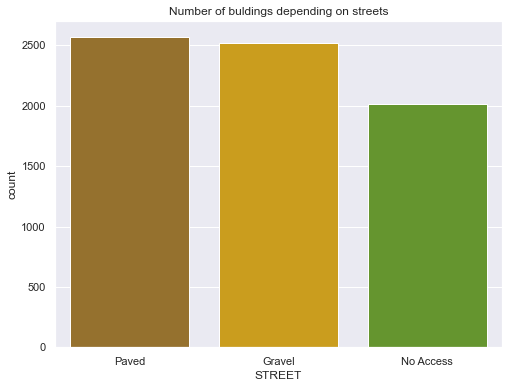

In [519]:
# Distribution 

sns.set_palette('Dark2_r')
plt.figure(figsize=(8,6))
sns.countplot(x='STREET', data=data)
plt.xticks(rotation=0)
plt.title('Number of buldings depending on streets')

- It can be noted that the most number of buildings have a paved street.


Let us check if SALES_PRICE is affected by STREET

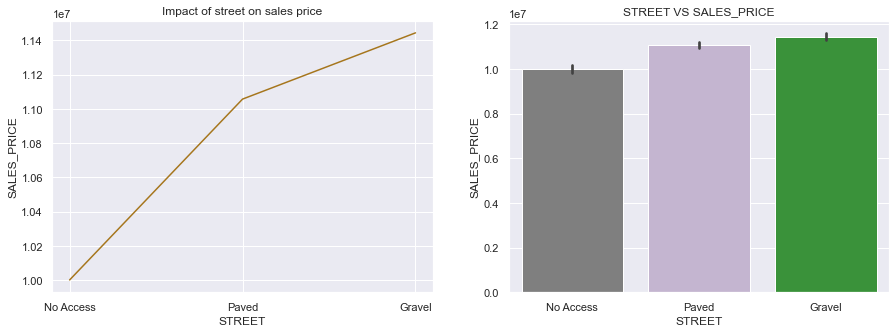

In [520]:
# STREET Vs SALES_PRICE

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.set_palette('hot')
sns.lineplot(x='STREET', y='SALES_PRICE', data=data[['STREET', 'SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE').reset_index())
plt.title('Impact of street on sales price')

plt.subplot(122)
sns.barplot(x='STREET', y='SALES_PRICE', data=data, palette='tab20_r', order=data[['STREET', 'SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE').reset_index().STREET)
# plt.xticks(rotation=30)
plt.title('STREET VS SALES_PRICE')

plt.show()

- It can be observed here that SALES_PRICES are highest for buildings associated with Gravel street.
- SALES_PRICE is the lowest for buildings that have No Accss to street.
- We can label encode this feature too as we can use any method to encode.


Let's check if BUILDTYPE and STREET are related

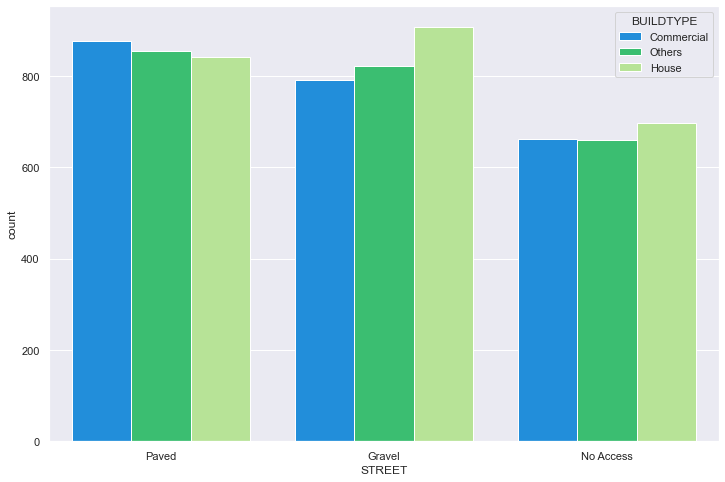

In [521]:
# BUILDTYPE vs. STREET

plt.figure(figsize=(12,8))
sns.set_palette('terrain')

sns.countplot(x='STREET', hue='BUILDTYPE', data=data)
plt.show()

- Here, we can see that there are less number of houses with paved street.a 
- However, number of houses are more when it comes to Gravel or No Access street
- Most commercial buildings have Paved street


Let us also see if AREA and STREET are related

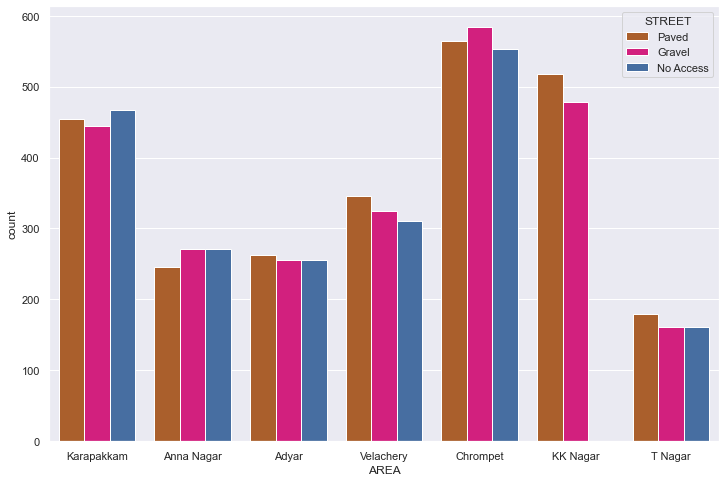

In [522]:
# AREA vs. STREET

plt.figure(figsize=(12,8))
sns.set_palette('Accent_r')

sns.countplot(x='AREA', hue='STREET', data=data)
plt.show()

- Karapakkam, Anna Nagar and Chrompet has lower number of Paved street compared to the other streets
- T Nagar has the lowest number of any kind of street
- KK Nagar does not have No Access street
- Adyar has almost the same number of Gravel and No Access street


Finally, let's check how SALES_PRICE is affected by the STREET in each AREA

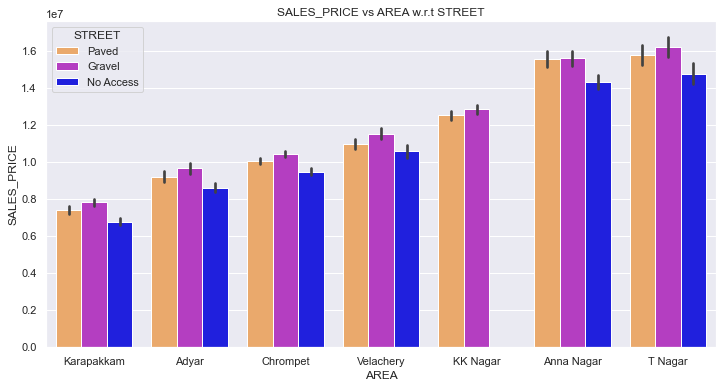

In [523]:
# SALES_PRICE vs. STREET for each AREA

plt.figure(figsize=(12, 6))

sns.barplot(x='AREA', y='SALES_PRICE', hue='STREET', data=data, palette='gnuplot2_r', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title('SALES_PRICE vs AREA w.r.t STREET')
plt.show()

- It can clearly be seen that the SALES_PRICE are the lowest for buildings with No Access street regardless of the AREA.
- SALES_PRICE is the highest for the buildings with Gravel street for all the areas.


#### ****MZZONE****

In [524]:
data.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

Text(0.5, 1.0, 'Number of buldings depending on zone')

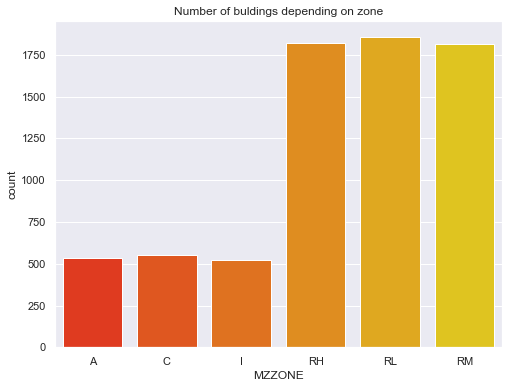

In [525]:
# Distribution 

sns.set_palette('autumn')
plt.figure(figsize=(8,6))
sns.countplot(x='MZZONE', data=data, order=data['BUILDTYPE'].groupby(data['MZZONE']).count().reset_index().MZZONE)
plt.xticks(rotation=0)
plt.title('Number of buldings depending on zone')

- Here, we can see that most number of buildings are in RL zone and leasr are in I zone.
- RH and RM zones have almost the same number of buildings.


Let's see how MZZONE affects the SALES_PRICE

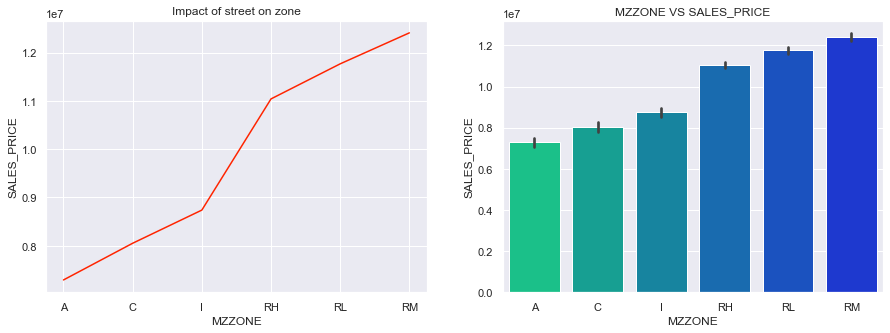

In [526]:
# MZZONE Vs SALES_PRICE

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.set_palette('hsv')
sns.lineplot(x='MZZONE', y='SALES_PRICE', data=data[['MZZONE', 'SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE').reset_index())
plt.title('Impact of street on zone')

plt.subplot(122)
sns.barplot(x='MZZONE', y='SALES_PRICE', data=data, palette='winter_r', order=data[['MZZONE', 'SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE').reset_index().MZZONE)
# plt.xticks(rotation=30)
plt.title('MZZONE VS SALES_PRICE')

plt.show()

- We can see that RM zone has the highest sales price than RL even though RL zone has more number of buildings.
- There is a linear trend so we can do label encoding on the MZZONE feature.
- Same goes with the I zone. It has more sales price than A and C zones which have more number of buildings that zone I.


Let's check number of buildings with respect to BUILDTYPE in each MZZONE

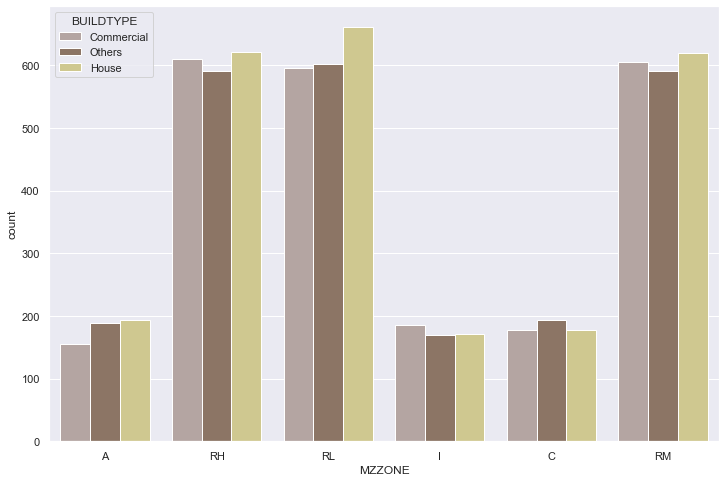

In [527]:
# BUILDTYPE vs. MZZONE

plt.figure(figsize=(12,8))
sns.set_palette('terrain_r')

sns.countplot(x='MZZONE', hue='BUILDTYPE', data=data)
plt.show()

- Here, it can be observed that commercial buildings are more than other BUILDTYPE in I and C zones.
- Rest of the zones have more houses than any other BUILDTYPE.


Let us now check and see if there is any relation between AREA na MZZONE

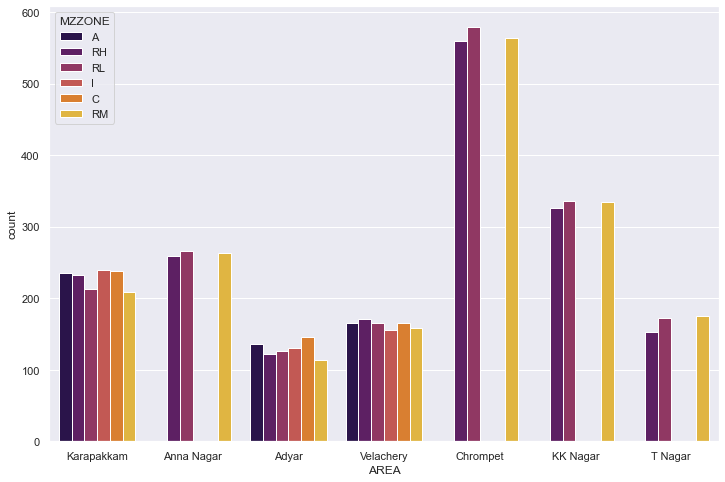

In [528]:
# AREA vs. MZZONE

plt.figure(figsize=(12,8))
sns.set_palette('inferno')

sns.countplot(x='AREA', hue='MZZONE', data=data)
plt.show()

- It can be seen that Anna Nagar, Chrompet, KK Nagar and T Nagar does not have I and C zones.
- RM zone either equal or less than other zones in each area.
- Apart from Adyar, RH zone is the highest in each area.


Let's see how SALES_PRICES are affected by MZZONE with respect to BUILDTYPE

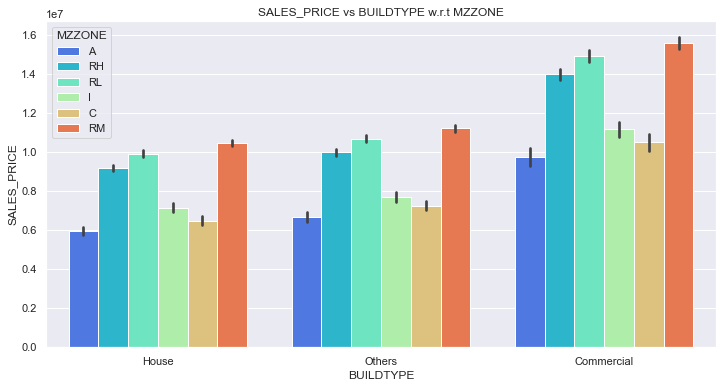

In [529]:
plt.figure(figsize=(12, 6))

sns.barplot(x='BUILDTYPE', y='SALES_PRICE', hue='MZZONE', data=data, palette='rainbow', order=data[['BUILDTYPE', 'SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index().BUILDTYPE)
plt.title('SALES_PRICE vs BUILDTYPE w.r.t MZZONE')
plt.show()

- Each buildtype has RM zone for the highest SALES_PRICE.


Now, finall let's check how SALES_PRICE is impacted for each AREA

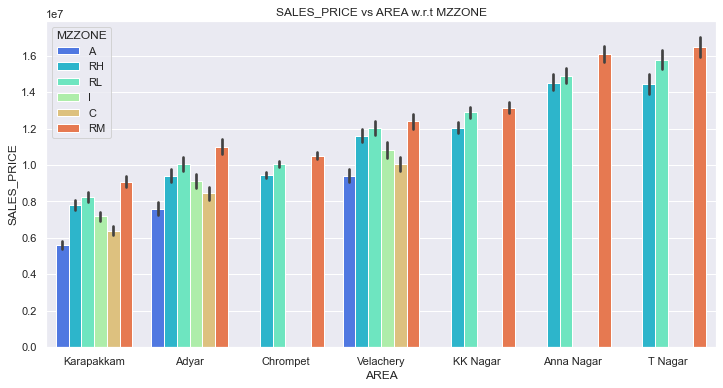

In [530]:
# SALES_PRICE vs. MZZONE for each AREA

plt.figure(figsize=(12, 6))

sns.barplot(x='AREA', y='SALES_PRICE', hue='MZZONE', data=data, palette='rainbow', order=data[['AREA', 'SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title('SALES_PRICE vs AREA w.r.t MZZONE')
plt.show()

- RM zone prices are the highest in each area follwed by RL zone.


#### ****QS_ROOMS****

In [531]:
# data.QS_ROOMS.value_counts()

data.QS_ROOMS.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

<AxesSubplot:xlabel='QS_ROOMS'>

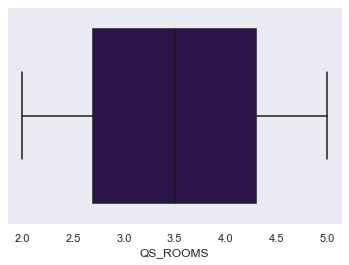

In [532]:
# Checking for outliers as we are looking into a continuous feature

sns.set_style('dark')
sns.boxplot(x='QS_ROOMS', data=data)

- No outliers were found in this feature.

<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

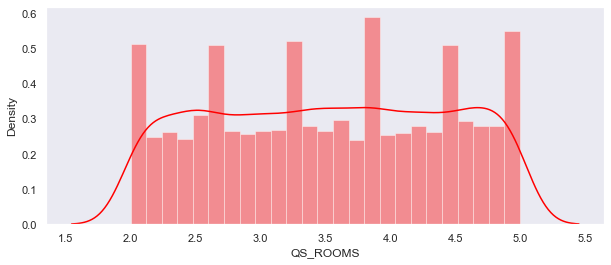

In [533]:
# Distribution 

plt.figure(figsize=(10,4))
sns.set_style('dark')
sns.distplot(data.QS_ROOMS, kde=True, color='red', bins=25)

In [534]:
data[['QS_ROOMS', 'SALES_PRICE']].corr()

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.00,0.02
SALES_PRICE,0.02,1.00


<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

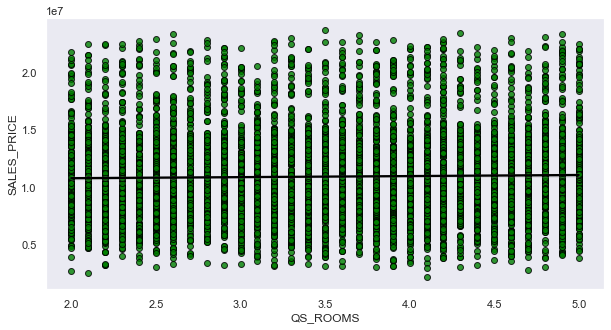

In [535]:
# Plotting relation between QS_ROOMS and SALES_PRICE

plt.figure(figsize=(10,5))
sns.regplot(x='QS_ROOMS', y='SALES_PRICE', data=data, scatter_kws={"color": "Green", "edgecolor": "Black"}, line_kws={"color": "Black"})

- We can see that there is near to 0 correlation between QS_ROOMS and SALES_PRICE.


#### ****QS_BATHROOM****

In [536]:
data.QS_BATHROOM.unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

<AxesSubplot:xlabel='QS_BATHROOM'>

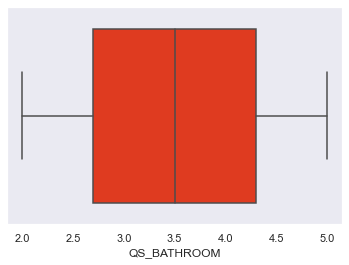

In [537]:
# Checking for outliers as we are looking into a continuous feature

sns.set_style('dark')
sns.set_palette('autumn')
sns.boxplot(x='QS_BATHROOM', data=data)

- There is no outlier in this feature.

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='Density'>

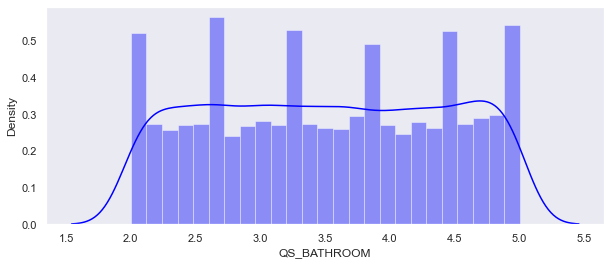

In [538]:
# Distribution 

plt.figure(figsize=(10,4))
sns.set_style('dark')
sns.distplot(data.QS_BATHROOM, kde=True, color='blue', bins=25)

In [539]:
data[['QS_BATHROOM', 'SALES_PRICE']].corr()

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.00,-0.01
SALES_PRICE,-0.01,1.00


<AxesSubplot:xlabel='QS_BATHROOM', ylabel='SALES_PRICE'>

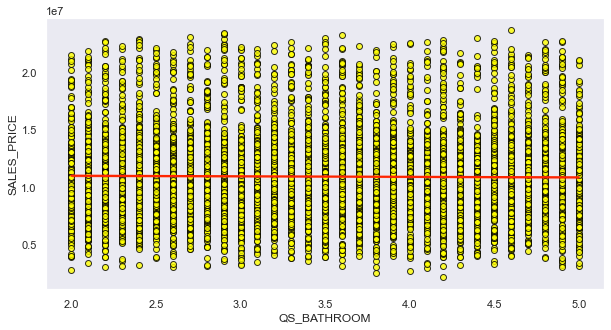

In [540]:
# Plotting relation between QS_ROOMS and SALES_PRICE

plt.figure(figsize=(10,5))
sns.regplot(x='QS_BATHROOM', y='SALES_PRICE', data=data, scatter_kws={"color": "yellow", "edgecolor": "Black"})

- We can see that there is near to 0(Negative to ber exact) correlation between QS_BATHROOM and SALES_PRICE.


#### ****QS_BEDROOM****

In [541]:
data.QS_BEDROOM.unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

<AxesSubplot:xlabel='QS_BEDROOM'>

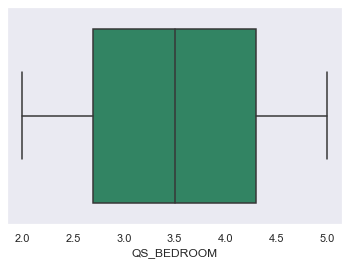

In [542]:
# Checking for outliers as we are looking into a continuous feature

sns.set_style('dark')
sns.set_palette('summer')
sns.boxplot(x='QS_BEDROOM', data=data)

- No outliers present in this feature.

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='Density'>

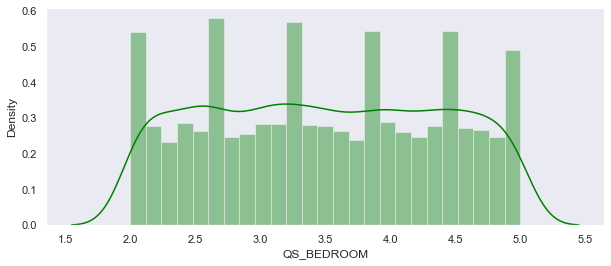

In [543]:
# Distribution 

plt.figure(figsize=(10,4))
sns.set_style('dark')
sns.distplot(data.QS_BEDROOM, kde=True, color='green', bins=25)

In [544]:
data[['QS_BEDROOM', 'SALES_PRICE']].corr()

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.00,0.02
SALES_PRICE,0.02,1.00


<AxesSubplot:xlabel='QS_BATHROOM', ylabel='SALES_PRICE'>

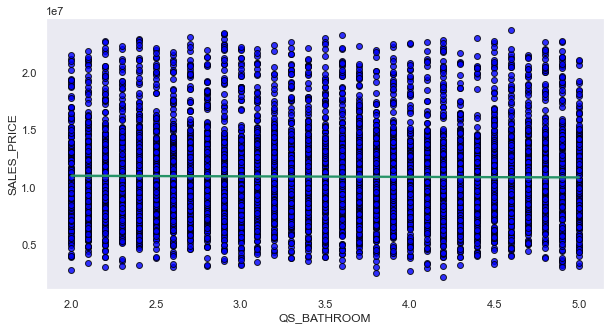

In [545]:
# Plotting relation between QS_ROOMS and SALES_PRICE

plt.figure(figsize=(10,5))
sns.regplot(x='QS_BATHROOM', y='SALES_PRICE', data=data, scatter_kws={"color": "blue", "edgecolor": "black"})

- It can be observed that there is near to 0 correlation between QS_BEDROOM and SALES_PRICE.


Since these features(QS_BEDROOM, QS_BATHROOM, & QS_ROOMS) have close to zero effect on our dependent variable, we can drop them from our data.

In [546]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

In [547]:
# Dropping ineffective columns from our data

data.drop(['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', ], axis=1, inplace=True)


In [548]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'HOUSE_AGE'],
      dtype='object')

#### ****QS_OVERALL****

<AxesSubplot:xlabel='QS_OVERALL', ylabel='Density'>

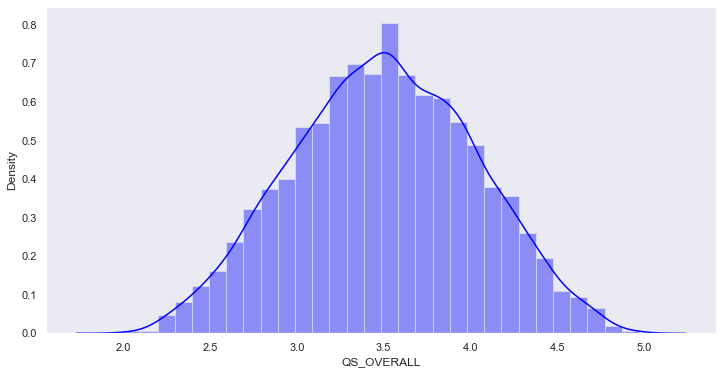

In [549]:
# Distribution

plt.figure(figsize=(12,6))
sns.set_style('dark')
sns.distplot(data.QS_OVERALL, kde=True, color='blue', bins=30)

- It can be observed that QS_OVERALL follows normal distribution.


<AxesSubplot:xlabel='QS_OVERALL'>

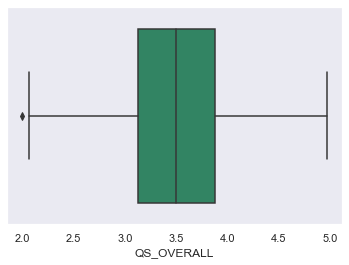

In [550]:
# Checking for outliers as we are looking into a continuous feature

sns.set_style('dark')
sns.boxplot(x='QS_OVERALL', data=data)

- It can be seen that there is just one or minimal outlier in this feature which can be ignored as it will not have much impact on our model.

In [551]:
data[['QS_OVERALL', 'SALES_PRICE']].corr()

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.00,0.02
SALES_PRICE,0.02,1.00


Text(0.5, 1.0, 'QS_OVERALL-wise order/change in SALES_PRICE')

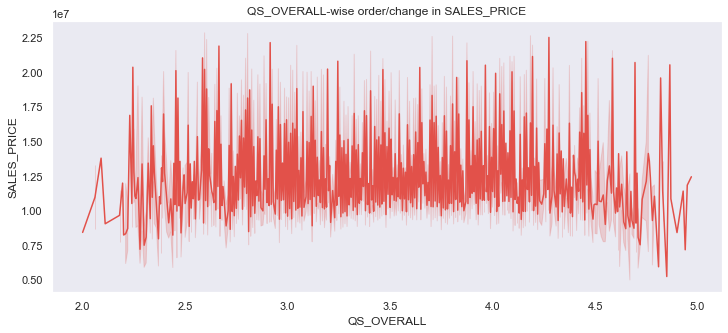

In [552]:
# Linearity between QS_OVERALL and SALES_PRICE

plt.figure(figsize=(12, 5))

sns.set_palette('Spectral')
sns.lineplot(x=data.QS_OVERALL, y=data.SALES_PRICE)
plt.title('QS_OVERALL-wise order/change in SALES_PRICE')


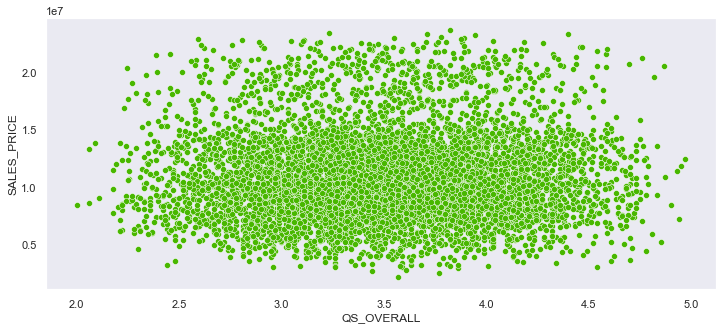

In [553]:
# Plotting relation between QS_OVERALL and SALES_PRICE

plt.figure(figsize=(12, 5))
sns.set_palette('brg_r')
sns.scatterplot(x='QS_OVERALL', y='SALES_PRICE', data=data)

plt.show()

- Not enough conclusion can be drawn from here about the relationship between QS_OVERALL and SALES_PRICE as QS_OVERALL is normally distributed.
- However, these two have a correlation of about 0.2 which means that they are not correlated.

#### ****REG_FEE****

<AxesSubplot:xlabel='REG_FEE'>

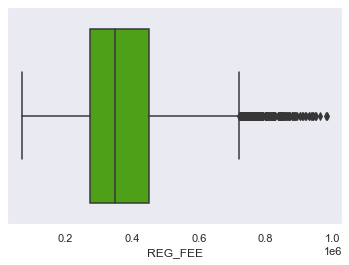

In [554]:
# Checking for outliers as we are looking into a continuous feature

sns.set_style('dark')
sns.boxplot(x='REG_FEE', data=data)

- We can see there are a lot of outliers in our feature, but we are not going to remove them as they are important in our SALES_PRICE calculations as they follow normal distribution and are correlated with our target variables.


In [555]:
data.REG_FEE.describe()

count     7109.00
mean    376938.33
std     143070.66
min      71177.00
25%     272406.00
50%     349486.00
75%     451562.00
max     983922.00
Name: REG_FEE, dtype: float64

In [556]:
# data_rf_log = np.log(data['REG_FEE'])

- Using IQR to detect the number of outliers along with the abrplot.

In [557]:
'''Q1 = data['REG_FEE'].quantile(0.25)
Q3 = data['REG_FEE'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

print(lower_lim)
print(upper_lim)'''

"Q1 = data['REG_FEE'].quantile(0.25)\nQ3 = data['REG_FEE'].quantile(0.75)\nIQR = Q3 - Q1\n\nprint(IQR)\n\nlower_lim = Q1 - 1.5 * IQR\nupper_lim = Q3 + 1.5 * IQR\n\nprint(lower_lim)\nprint(upper_lim)"

In [558]:
# data['REG_FEE'][(data['REG_FEE'] < lower_lim) | (data['REG_FEE'] > upper_lim)]

In [559]:
# data['REG_FEE'][~(data['REG_FEE'] < lower_lim) | (data['REG_FEE'] > upper_lim)]

In [560]:
# data = data[(data['REG_FEE'] < lower_lim) | (data['REG_FEE'] > upper_lim)]

In [561]:
data.shape

(7109, 17)

Let's check boxplot and histogram of our data after dropping outliers.

In [562]:
# Checking for outliers as we are looking into a continuous feature

'''sns.set_style('dark')
sns.set_palette('autumn')
sns.boxplot(x='REG_FEE', data=data)'''

"sns.set_style('dark')\nsns.set_palette('autumn')\nsns.boxplot(x='REG_FEE', data=data)"

<AxesSubplot:xlabel='REG_FEE', ylabel='Density'>

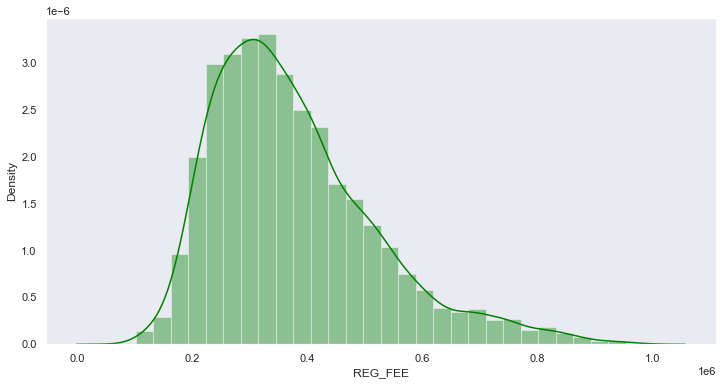

In [563]:
# Distribution

plt.figure(figsize=(12,6))
sns.set_style('dark')
sns.distplot(data.REG_FEE, kde=True, color='green', bins=30)

In [564]:
data.REG_FEE.describe()

count     7109.00
mean    376938.33
std     143070.66
min      71177.00
25%     272406.00
50%     349486.00
75%     451562.00
max     983922.00
Name: REG_FEE, dtype: float64

In [565]:
data[['REG_FEE', 'SALES_PRICE']].corr()

,REG_FEE,SALES_PRICE
REG_FEE,1.00,0.88
SALES_PRICE,0.88,1.00


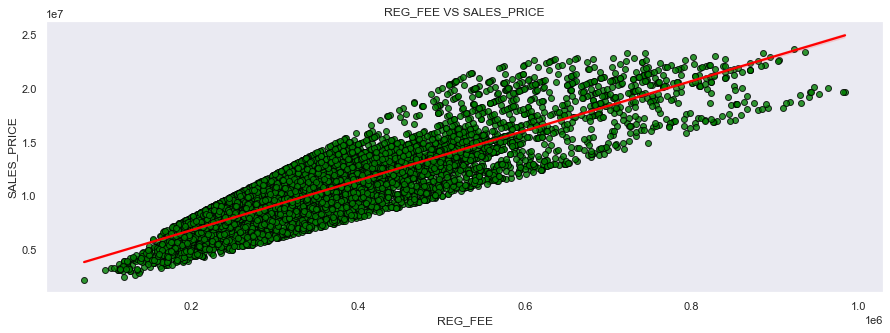

In [566]:
# REG_FEE Vs SALES_PRICE after removing outliers

plt.figure(figsize=(15,5))

sns.set_palette('gist_gray')
sns.regplot(x='REG_FEE', y='SALES_PRICE', data=data, scatter_kws={"color": "green", "edgecolor": "Black"}, line_kws={"color": "red"})
plt.title('REG_FEE VS SALES_PRICE')

plt.show()

- REG_FEE and SALES_PRICE are correlated as the correlation value is good.

#### ****COMMIS****

<AxesSubplot:xlabel='COMMIS'>

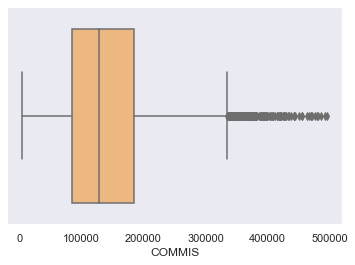

In [567]:
# Checking for outliers as we are looking into a continuous feature

sns.set_style('dark')
sns.set_palette('gist_heat_r')
sns.boxplot(x='COMMIS', data=data)

- There were some, but we are going to keep them just like outliers from REG_FEE.

In [568]:
data[['COMMIS', 'SALES_PRICE']].corr()

,COMMIS,SALES_PRICE
COMMIS,1.00,0.63
SALES_PRICE,0.63,1.00


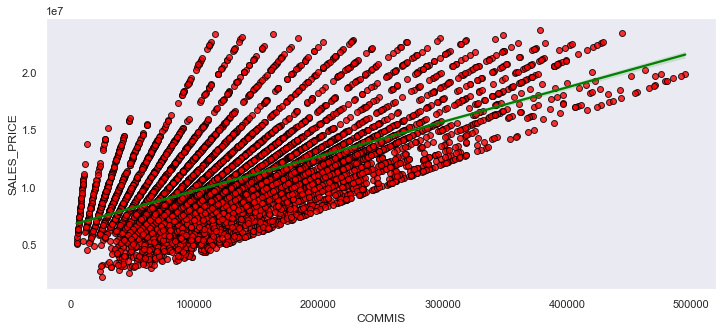

In [569]:
# Plotting relation between COMMIS and SALES_PRICE

plt.figure(figsize=(12, 5))
sns.set_palette('magma_r')
sns.regplot(x='COMMIS', y='SALES_PRICE', data=data, scatter_kws={"color": "red", "edgecolor": "Black"}, line_kws={"color": "green"})

plt.show()

- Here, we can see that COMMIS and SALES_PRICE are correlated.


In [570]:
data.shape

(7109, 17)

Important thing that I realised after trying to remove outliers is that they were changing the way my data was looking. Also, the outliers are needed in these data as those outliers are there in relation with other feature/data.

## Encoding categorical features

In [571]:
pd.DataFrame(data.dtypes.value_counts()).T

,int64,object,float64
0,9,7,1


In [572]:
data.shape

(7109, 17)

In [573]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int64  
 4   N_BATHROOM     7109 non-null   int64  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_OVERALL     7109 non-null   float64
 13  REG_FEE        7109 non-null   int64  
 14  COMMIS         7109 non-null   int64  
 15  SALES_PRICE    7109 non-null   int64  
 16  HOUSE_AGE      7109 non-null   int64  
dtypes: float64(1), int64(9), object(7)
memory usage: 944

In [574]:
from sklearn.preprocessing import LabelEncoder

lb_encoder = LabelEncoder()

In [575]:
# Label endoing the categorical features

data['PARK_FACIL']=lb_encoder.fit_transform(data['PARK_FACIL'])
data['AREA']=lb_encoder.fit_transform(data['AREA'])
data['BUILDTYPE']=lb_encoder.fit_transform(data['BUILDTYPE'])
data['SALE_COND']=lb_encoder.fit_transform(data['SALE_COND'])
data['UTILITY_AVAIL']=lb_encoder.fit_transform(data['UTILITY_AVAIL'])
data['STREET']=lb_encoder.fit_transform(data['STREET'])

Manually/explicitly encoding MZZONE feature to maintain the order.

In [576]:
mzzone_mapping =  {'A' : 1, 'RH' : 4, 'RL' : 5, 'I' : 3, 'C' : 2, 'RM' : 6}

data = data.replace({'MZZONE': mzzone_mapping})

In [577]:
data.head(5)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,4,1004,131,1,1,3,0,1,0,0,2,1,4.33,380000,144400,7600000,43
1,1,1986,26,2,1,5,0,0,0,0,0,4,3.77,760122,304049,21717770,11
2,0,909,70,1,1,3,0,1,0,1,0,5,3.09,421094,92114,13159200,19
3,6,1855,14,3,2,5,2,0,2,2,2,3,4.01,356321,77042,9630290,22
4,4,1226,84,1,1,3,0,1,2,0,0,2,3.29,237000,74063,7406250,29


## Feature importance

Correlation between the features

In [578]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr

In [579]:
X = data.drop(['SALES_PRICE'], axis=1)
y = data['SALES_PRICE']

In [580]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=79)

In [581]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

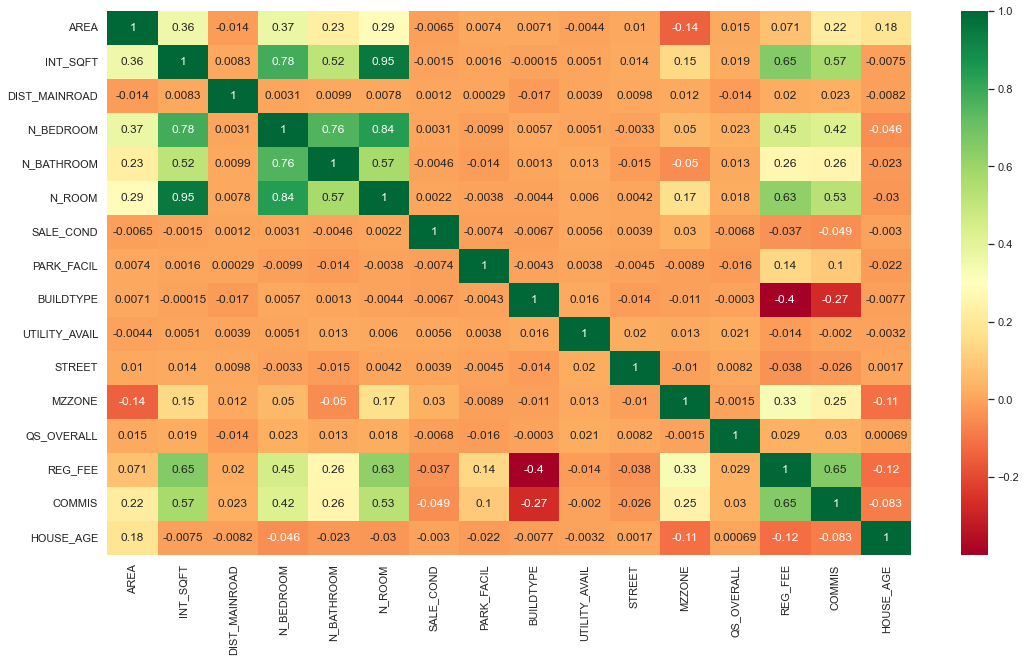

In [582]:
# Using Pearson Correlation

plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap='RdYlGn')
plt.show()

Removing highly correlated features

In [583]:
def correlation(dataset, threshold):

    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                
    return col_corr

In [584]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))
print('This column(s) is/are highly correlated with another column:', corr_features)

This column(s) is/are highly correlated with another column: {'N_ROOM'}


In [585]:
new_X_train = X_train.drop(corr_features,axis=1)
new_X_test = X_test.drop(corr_features,axis=1)

In [586]:
new_X_train.shape

(5687, 15)

In [587]:
train = pd.concat([new_X_train, y_train],axis=1)
test = pd.concat([new_X_test, y_test],axis=1)

In [588]:
new_data = pd.concat([train,test],axis=0)

In [589]:
new_data.shape

(7109, 16)

Correlation with target variable

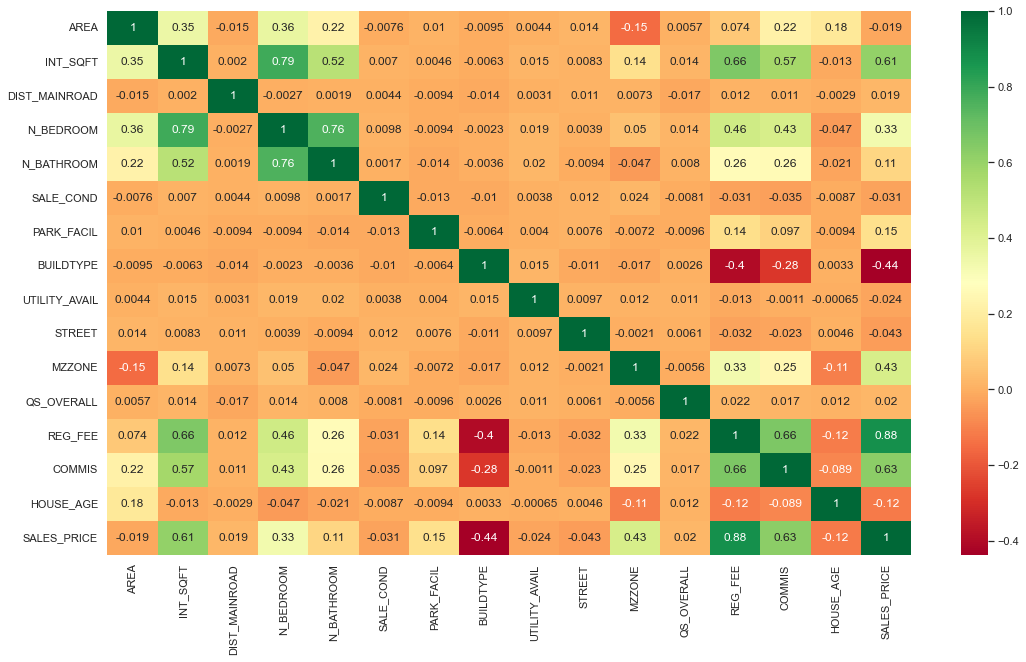

In [590]:
# Using Pearson Correlation

plt.figure(figsize=(18,10))
corr = new_data.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

In [591]:
X = new_data.drop(['SALES_PRICE'], axis=1)
y = new_data['SALES_PRICE']

In [592]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=79)

In [593]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 15), (1422, 15), (5687,), (1422,))

In [594]:
best_features_X = SelectKBest(score_func=f_regression, k=10).fit_transform(X, y)

In [595]:
correlation_list=[]
for column in X.columns:
  corr_list = pearsonr(X[column], y)
  correlation_list.append([column, corr_list[0], corr_list[1]])


In [596]:
corr_data=pd.DataFrame(correlation_list, columns=['Features','Correlation','P-Value'])
corr_data.sort_values(by='P-Value', inplace=True)
corr_data.T

,1,7,12,13,10,3,6,14,4,9,5,8,11,0,2
Features,INT_SQFT,BUILDTYPE,REG_FEE,COMMIS,MZZONE,N_BEDROOM,PARK_FACIL,HOUSE_AGE,N_BATHROOM,STREET,SALE_COND,UTILITY_AVAIL,QS_OVERALL,AREA,DIST_MAINROAD
Correlation,0.61,-0.44,0.88,0.63,0.43,0.33,0.15,-0.12,0.11,-0.04,-0.03,-0.02,0.02,-0.02,0.02
P-Value,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.08,0.11,0.11


In [597]:
model_training_feature1 = corr_data['Features']
model_training_feature1 = model_training_feature1.to_list()

model_training_feature = corr_data['Features']
model_training_feature = model_training_feature.to_list()

model_training_feature



['INT_SQFT',
 'BUILDTYPE',
 'REG_FEE',
 'COMMIS',
 'MZZONE',
 'N_BEDROOM',
 'PARK_FACIL',
 'HOUSE_AGE',
 'N_BATHROOM',
 'STREET',
 'SALE_COND',
 'UTILITY_AVAIL',
 'QS_OVERALL',
 'AREA',
 'DIST_MAINROAD']

In [598]:
new_data = pd.DataFrame(new_data, columns=model_training_feature)
new_data = pd.concat([new_data, data['SALES_PRICE']], axis=1)

In [599]:
new_data.head(4)

,INT_SQFT,BUILDTYPE,REG_FEE,COMMIS,MZZONE,N_BEDROOM,PARK_FACIL,HOUSE_AGE,N_BATHROOM,STREET,SALE_COND,UTILITY_AVAIL,QS_OVERALL,AREA,DIST_MAINROAD,SALES_PRICE
0,1004,0,380000,144400,1,1,1,43,1,2,0,0,4.33,4,131,7600000
1,1986,0,760122,304049,4,2,0,11,1,0,0,0,3.77,1,26,21717770
2,909,0,421094,92114,5,1,1,19,1,0,0,1,3.09,0,70,13159200
3,1855,2,356321,77042,3,3,0,22,2,2,2,2,4.01,6,14,9630290


In [600]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 15), (1422, 15), (5687,), (1422,))

We'll check multicolinearit using Variance Inflation Factor. IF VIF is more than 4, we have to investigate and change the feature.

In [601]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
r2 = lr_model.score(X_train, y_train)
vif = 1/(1-r2)
vif

7.428076145013951

## Modeling

Let us now try modelling regression models and predict.

In [602]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [603]:
df = new_data

In [604]:
df.shape

(7109, 16)

In [605]:
X = new_data.drop('SALES_PRICE', axis=1)
y = df['SALES_PRICE']

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 15), (1422, 15), (5687,), (1422,))

In [608]:
scaler = StandardScaler()
minmax = MinMaxScaler()

In [609]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's do moedling with ****CROSS VALIDATION****.

In [610]:
from sklearn.model_selection import cross_val_score

In [611]:
# xg_model = XGBRegressor()

xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 
                
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')



In [613]:
CV_Linear_regression = cross_val_score(lr_model, X_train_scaled, y_train, cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:", round(CV_Linear_regression, 2))

The cross_validation score of an Linear_Regression model is: 0.86


In [618]:
CV_XG_Boost = cross_val_score(xg_model, X_train_scaled,y_train, cv=10).mean()
print("The cross_validation score of an XG_Boost model is:", round(CV_XG_Boost, 2))

The cross_validation score of an XG_Boost model is: 1.0


In [617]:
CV_Random_Forest = cross_val_score(rf, X_train_scaled, y_train, cv=10).mean()
print("The cross_validation score of an XG_Boost model is:", round(CV_Random_Forest, 2))

The cross_validation score of an XG_Boost model is: 0.84


In [619]:
from scipy import stats

In [686]:
def get_prediction_range(prediction, y_test, test_predictions, pi=.95):
    '''
    INPUTS: 
        - Single prediction, 
        - y_test
        - All test set predictions,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs) 
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    
    #generate prediction interval lower and upper bound
    lower, upper = prediction - interval, prediction + interval

    # print('Sales price is between the range {lower} and {upper}'.format(lower=round(lower, 2), upper=round(upper, 2)))
    # print('Actual sales prediction: ', round(prediction, 2))

    return lower, prediction, upper

In [621]:
# get_prediction_range(predictions[0], y_test, predictions)

Let's do moedling with **** WITHOUT CROSS VALIDATION****.

##### 1. Linear Regression

In [632]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [633]:
lr_y_pred = lr_model.predict(X_test_scaled)

In [638]:
print('R-squared for linear model: ', round(r2_score(y_test, lr_y_pred), 2))

R-squared for linear model:  0.87


In [731]:
# get_prediction_range(lr_y_pred[0], y_test, lr_y_pred)

##### 2. XGBOOST #####

In [636]:
xg_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1.5,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
xg_y_pred = xg_model.predict(X_test_scaled)

In [639]:
xg_y_pred = xg_model.predict(X_test_scaled)

In [640]:
print('R-squared for xgboost model: ', round(r2_score(y_test, xg_y_pred), 2))

R-squared for xgboost model:  1.0


In [732]:
# get_prediction_range(xg_y_pred[0], y_test, xg_y_pred)

##### 3. Random Forest #####

In [740]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=1000)

In [741]:
rf_pred = rf.predict(X_test_scaled)

In [742]:
print('R-squared for random forest model: ', round(r2_score(y_test, rf_pred), 2))

R-squared for random forest model:  0.83


In [733]:
# get_prediction_range(rf_pred[0], y_test, rf_pred)

##### 4. Ensemble Technique #####

In [715]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)

model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree',model4)])
# model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3)])
model.fit(X_train_scaled,y_train)
et_y_pred=model.predict(X_test_scaled)
print("Ensemble Technique R-squared metric: ",r2_score(y_test,et_y_pred))

Ensemble Technique R-squared metric:  0.9664244002913646


In [734]:
# get_prediction_range(et_y_pred[0], y_test, et_y_pred)

In [743]:
print("XGBoost model R-squared value: {val}%".format(val=round(r2_score(y_test, xg_y_pred) *100, 2)))
print("Ensemble Technique R-squared value: {val}%".format(val=round(r2_score(y_test, et_y_pred) *100, 2)))
print("Linear Regression model R-squared value: {val}%".format(val=round(r2_score(y_test, lr_y_pred) *100, 2)))
print("Random forest Regressor model R-squared value: {val}%".format(val=round(r2_score(y_test, rf_pred) *100, 2)))

XGBoost model R-squared value: 99.74%
Ensemble Technique R-squared value: 96.64%
Linear Regression model R-squared value: 87.09%
Random forest Regressor model R-squared value: 83.44%


In [744]:
# Linear Regression sales price range
lr_lower = get_prediction_range(lr_y_pred[0], y_test, lr_y_pred)[0]
lr_upper = get_prediction_range(lr_y_pred[0], y_test, lr_y_pred)[2]
lr_pred = get_prediction_range(lr_y_pred[0], y_test, lr_y_pred)[1]

# XGBoost sales price range
xg_lower = get_prediction_range(xg_y_pred[0], y_test, xg_y_pred)[0]
xg_upper = get_prediction_range(xg_y_pred[0], y_test, xg_y_pred)[2]
xg_pred = get_prediction_range(xg_y_pred[0], y_test, xg_y_pred)[1]

# Random Forest sales price range
rf_lower = get_prediction_range(rf_pred[0], y_test, rf_pred)[0]
rf_upper = get_prediction_range(rf_pred[0], y_test, rf_pred)[2]
rf_pred = get_prediction_range(rf_pred[0], y_test, rf_pred)[1]


# # Ensemble Technique sales price range
et_lower = get_prediction_range(et_y_pred[0], y_test, et_y_pred)[0]
et_upper = get_prediction_range(et_y_pred[0], y_test, et_y_pred)[2]
et_pred = get_prediction_range(et_y_pred[0], y_test, et_y_pred)[1]


# get_prediction_range(xg_y_pred[0], y_test, xg_y_pred)
# get_prediction_range(rf_pred[0], y_test, rf_pred)
# get_prediction_range(et_y_pred[0], y_test, et_y_pred)

range_dict = {"Lowest price": [lr_lower, xg_lower, rf_lower, et_lower],
              "Highest price": [lr_upper, xg_upper, rf_upper, et_upper],
              "Actual price predictions": [lr_pred, xg_pred, rf_pred, et_pred]
              }

range_data = pd.DataFrame(range_dict, index=['Linear Regression', 'XGBoost', 'Random Forest', 'Ensemble Technique'])

print(range_data)
# print(lr_lower)

                    Lowest price  Highest price  Actual price predictions
Linear Regression     6382534.47    11788285.78                9085410.12
XGBoost               8720743.64     9480696.36                9100720.00
Random Forest         7465347.14    13587352.45               10526349.80
Ensemble Technique    8149206.20    10905592.96                9527399.58


## Conclusion

- My best model is XGBoost as it gives me the best prediction with an accuracy of 99.74%
- My Second best model turned out to be ensemble technique model with an accuracy of 96.6%
- Third best model is Linear Regression model with an accuracy of 87% followed by Random Forest which has an accuracy of 
